In [1]:
import os
import sys
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from copy import deepcopy
import numpy as np
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Now for some cross-sectional associations
#cs = pandas.read_csv('/Users/jakevogel/Science/tmp/tau/tau_adni_demo_cogchange_litROIs_updated.csv')
cs = pandas.read_csv('/Users/jakevogel/Science/tau/tau_adni_demo_cogchange_litROIs_earlytau.csv')
#cs.columns[-60:]
cs.columns[-69:]



Index(['dkt_Braak_new_atlas_1', 'dkt_Braak_new_atlas_2',
       'dkt_Braak_new_atlas_3', 'dkt_Braak_new_atlas_4',
       'dkt_Braak_new_atlas_5', 'dkt_Braak_new_atlas_6', 'dkt_Braak_stage_1_1',
       'dkt_Braak_stage_2_2', 'dkt_Braak_stage_3_3', 'dkt_Braak_stage_4_4',
       'dkt_Braak_stage_5_5', 'dkt_Braak_stage_6_6', 'dkt_Cho_new_atlas_1',
       'dkt_Cho_new_atlas_2', 'dkt_Cho_new_atlas_3', 'dkt_Cho_new_atlas_4',
       'dkt_Cho_new_atlas_5', 'dkt_Cho_stage_1_1', 'dkt_Cho_stage_2_2',
       'dkt_Cho_stage_3_3', 'dkt_Cho_stage_4_4', 'dkt_Cho_stage_5_5',
       'inf_temp_1', 'schwarz_atlas_1', 'schwarz_atlas_2', 'schwarz_atlas_3',
       'schwarz_atlas_4', 'schwarz_atlas_5', 'schwarz_atlas_6',
       'schwarz_atlas_10', 'ADNI_MEM', 'ADNI_EF', 'n89_libmask_1',
       'n89_libmask_2', 'n89_libmask_3', 'n89_libmask_4', 'n89_libmask_5',
       'n89_libmask_6', 'n89_libmask_core_1', 'n89_libmask_core_2',
       'n89_libmask_core_3', 'n89_libmask_core_4', 'n89_libmask_core_5',
       'n89

In [3]:
ncols = [] 
for col in cs.columns:
    if '.' in col:
        ncols.append(col.split('.')[0])
    else:
        ncols.append(col)

cs.columns = ncols

In [4]:
#taucols = cs.columns[-60:].tolist()
taucols = cs.columns[-69:].tolist()
taucols.remove('ADNI_MEM')
taucols.remove('ADNI_EF')
taucols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_1_1',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_1_1',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'schwarz_atlas_10',
 'n89_libmask_1',
 'n89_libmask_2',
 'n89_libmask_3',
 'n89_libmask_4',
 'n89_libmask_5',
 'n89_libmask_6',
 'n89_libmask_core_1',
 'n89_libmask_core_2',
 'n89_libmask_core_3',
 'n89_libmask_core_4',
 'n89_libmask_core_5',
 'n89_libmask_core_6',
 'Schwarz_Stage_1',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwar

In [5]:
cs.columns[80:120]

Index(['EcogPtOrgan_bl', 'EcogPtDivatt_bl', 'EcogPtTotal_bl', 'EcogSPMem_bl',
       'EcogSPLang_bl', 'EcogSPVisspat_bl', 'EcogSPPlan_bl', 'EcogSPOrgan_bl',
       'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl', 'PIB_bl', 'AV45_bl',
       'Years_bl', 'Month_bl', 'Month', 'M', 'update_stamp', 'av45_status_wcb',
       'BRAAK1', 'BRAAK1_SIZE', 'BRAAK2', 'BRAAK2_SIZE', 'BRAAK3',
       'BRAAK3_SIZE', 'BRAAK4', 'BRAAK4_SIZE', 'BRAAK5', 'BRAAK5_SIZE',
       'BRAAK6', 'BRAAK6_SIZE', 'cluster_1', 'weighted_cluster_1', 'cluster_2',
       'weighted_cluster_2', 'cluster_3', 'weighted_cluster_3', 'cluster_4',
       'weighted_cluster_4', 'cluster_5'],
      dtype='object')

In [6]:
# Get data and nons
indvar = ['AGE','PTGENDER','PTEDUCAT']
pred_var = ['MMSE','ADNI_MEM','ADNI_EF','DX_final','av45_status_wcb']
a_indata=cs[taucols+indvar+pred_var].dropna()

gend = a_indata.PTGENDER
gend[gend=='Male'] = 1
gend[gend=='Female'] = 2
a_indata.PTGENDER = gend
a_indata.shape



//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(86, 75)

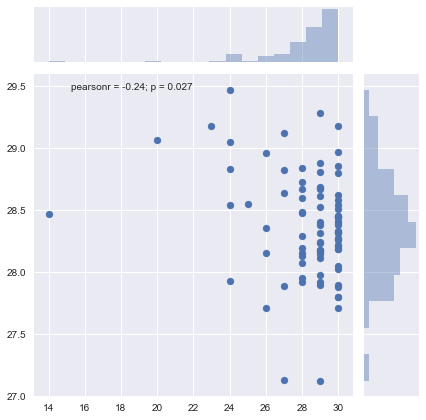

In [7]:
# one ROI
lr = linear_model.LinearRegression()
adni_xin = a_indata['n89_libmask_6'].values.reshape(-1,1)
adni_y = a_indata['MMSE'].values

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, adni_xin, adni_y, cv=10)

plt.close()
sns.jointplot(adni_y,predicted)
plt.show()
#fig, ax = plt.subplots()
#ax.scatter(y, predicted)
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#ax.set_xlabel('Measured')
#ax.set_ylabel('Predicted')
#plt.show()

In [8]:
# Now try again after removing the ADNI ROIs and the extra schwarz one...
ncols = []
for col in taucols:
    if 'n89' not in col and '_10' not in col and 'consensus' not in col:
        ncols.append(col)
ncols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_1_1',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_1_1',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'Schwarz_Stage_1',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwarz_Stage_4',
 'Schwarz_Stage_5',
 'Schwarz_Stage_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_2',
 'brain_partition_core_ind_lund_sci5_scf5_3',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund

In [9]:
## A FURTHER REMOVAL -- GET RID OF REDUNDANT VARIABLES AND THE ET3s
jnk = []
for col in ncols:
    if 'ET_3' not in col and 'stage_1' not in col and 'Stage_1' not in col:
        jnk.append(col)
ncols = jnk
ncols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwarz_Stage_4',
 'Schwarz_Stage_5',
 'Schwarz_Stage_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_2',
 'brain_partition_core_ind_lund_sci5_scf5_3',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund_sci5_scf5_5',
 'lund_ET_6_1',
 'lund_ET_6_2',
 'lund_ET_6_3',
 'l

In [10]:
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
# First, run the lasso including covariates
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
cov_cols = ncols[:-6] + ['AGE','PTGENDER','PTEDUCAT']
clf = linear_model.LassoCV(max_iter=100000)
n_xin = a_indata[ncols].values
# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(n_xin, adni_y)
n_features = sfm.transform(n_xin).shape[1]
print('there are %s features'%(n_features))
while n_features > 6:
    sfm.threshold += 0.1
    X_transform = sfm.transform(xin)
    n_features = X_transform.shape[1]

there are 5 features


In [11]:
cov_cols[-3:]

['AGE', 'PTGENDER', 'PTEDUCAT']

In [12]:
cog_cols = list(cs.columns[22:32]) + [cs.columns[38]] + [cs.columns[45]]
cog_cols.remove('MMSE') 



In [13]:
npreds = cog_cols + pred_var[:-1]
npreds

['CDRSB',
 'ADAS11',
 'ADAS13',
 'RAVLT_immediate',
 'RAVLT_learning',
 'RAVLT_forgetting',
 'RAVLT_perc_forgetting',
 'FAQ',
 'MOCA',
 'EcogPtTotal',
 'EcogSPTotal',
 'MMSE',
 'ADNI_MEM',
 'ADNI_EF',
 'DX_final']

In [14]:
jdf = cs[npreds+cov_cols[-3:]+ncols]

In [15]:
gcols = [x for x in jdf.columns.tolist() if jdf[x].count() > 87]
jdf = cs[gcols]

In [16]:
[x for x in jdf.index if any(~pandas.notnull(jdf.loc[x].values))]

[33, 45, 54, 80]

In [17]:
# A real quick check of the linear relationships since adding Lund ROIs
lin_res = pandas.DataFrame(index=ncols)
for dv in npreds[:-1]:
    if dv in jdf.columns:
        print('working on',dv)
    else:
        continue
    dat = jdf[(ncols+[dv]+cov_cols[-3:])].dropna()
    for col in ncols:
        mod = smf.ols('%s ~ %s + %s + %s + %s'%(dv,cov_cols[-3],
                                               cov_cols[-2],
                                               cov_cols[-1],col),
                                              data=dat).fit()
        lin_res.ix[col,'%s_t'%(dv)] = mod.tvalues[-1]
        lin_res.ix[col,'%s_p'%(dv)] = mod.pvalues[-1]
        lin_res.ix[col,'%s_beta'%(dv)] = mod.params[-1]
        lin_res.ix[col,'%s_se'%(dv)] = mod.bse[-1]
        

working on CDRSB
working on ADAS11
working on ADAS13
working on FAQ
working on MOCA
working on EcogPtTotal
working on EcogSPTotal
working on MMSE
working on ADNI_MEM
working on ADNI_EF


In [18]:
lin_res.sort_values('MMSE_t',ascending=True)

,CDRSB_t,CDRSB_p,CDRSB_beta,CDRSB_se,ADAS11_t,ADAS11_p,ADAS11_beta,ADAS11_se,ADAS13_t,ADAS13_p,...,MMSE_beta,MMSE_se,ADNI_MEM_t,ADNI_MEM_p,ADNI_MEM_beta,ADNI_MEM_se,ADNI_EF_t,ADNI_EF_p,ADNI_EF_beta,ADNI_EF_se
brain_partition_core_ind_lund_sci5_scf5_4,3.490443,0.000779,2.178533,0.624142,4.102491,0.000095,10.776315,2.626773,3.017973,0.003379,...,-3.270314,1.332577,-2.848801,0.005517,-1.296100,0.454963,-1.179992,0.241334,-0.513730,0.435367
brain_partition_core_ind_lund_sci5_scf5_3,3.329764,0.001304,2.117470,0.635922,3.391467,0.001067,9.272124,2.733957,2.349970,0.021149,...,-2.735385,1.368522,-2.301156,0.023860,-1.079661,0.469182,-1.375450,0.172649,-0.606243,0.440760
dkt_Cho_new_atlas_3,3.115246,0.002533,1.790455,0.574740,3.427771,0.000949,8.398258,2.450064,2.338146,0.021786,...,-2.419969,1.229237,-2.142031,0.035086,-0.905696,0.422821,-1.295794,0.198596,-0.513293,0.396123
dkt_Cho_stage_3_3,3.177614,0.002094,1.945538,0.612264,3.331183,0.001292,8.740848,2.623947,2.267675,0.025947,...,-2.409207,1.314366,-2.320907,0.022716,-1.041522,0.448756,-1.407260,0.163040,-0.593258,0.421570
inf_temp_1,2.760281,0.007123,1.518181,0.550010,3.050647,0.003065,7.162725,2.347936,2.033090,0.045239,...,-2.101719,1.166802,-1.972243,0.051872,-0.791830,0.401487,-1.577309,0.118483,-0.588169,0.372894
schwarz_atlas_5,2.746563,0.007401,1.681577,0.612248,2.780229,0.006719,7.332028,2.637203,1.824770,0.071634,...,-2.285431,1.300665,-1.306962,0.194792,-0.591793,0.452801,-0.450306,0.653650,-0.189533,0.420898
dkt_Cho_stage_4_4,2.786396,0.006620,2.400526,0.861516,3.242801,0.001706,11.869906,3.660387,2.182165,0.031924,...,-3.168821,1.824598,-2.056833,0.042805,-1.287157,0.625795,-0.844169,0.400973,-0.496729,0.588424
dkt_Cho_stage_5_5,2.640258,0.009915,2.444419,0.925826,3.116209,0.002516,12.256183,3.933042,2.064581,0.042085,...,-3.252980,1.953753,-1.936129,0.056215,-1.299119,0.670988,-0.709505,0.479976,-0.446967,0.629970
dkt_Braak_new_atlas_5,2.546407,0.012754,2.354430,0.924609,3.115375,0.002523,12.209339,3.919059,2.095063,0.039214,...,-3.237247,1.944805,-1.857774,0.066705,-1.242931,0.669043,-0.671199,0.503936,-0.421027,0.627276
dkt_Cho_new_atlas_4,2.581159,0.011627,2.414465,0.935419,3.129720,0.002415,12.414363,3.966604,2.099823,0.038781,...,-3.271634,1.969161,-1.914159,0.059005,-1.295042,0.676559,-0.624496,0.533994,-0.396756,0.635321


In [19]:
lin_res.sort_index(inplace=True)

In [20]:
newind = lin_res.index[:5].tolist() + ['C1. Subcortical','C2. Frontal','C3. Temporal','C4. Temporo-parietal', 'C5. Sensory '
                ] + ['Schöll_Single_%s'%x for x in range(1,7)] + ['Schöll_Stage_%s'%x for x in range(2,7)
                ] + ['Cho_Single_1'] + ['Cho_Single_%s'%x for x in range(3,7)] + ['Cho_Stage_%s'%x for x in range(3,7)
                ] + ['Inferior_Temporal'] + ['Lund_ET_%s'%x for x in range(1,7)
                                            ] + ['Schwarz_Single_%s'%x for x in range(1,7)] 
lin_res.index = newind




In [21]:
for col in lin_res.index[-12:-6]:
    lin_res.drop(col,axis=0,inplace=True)

In [22]:
lin_res.index

Index(['Schwarz_Stage_2', 'Schwarz_Stage_3', 'Schwarz_Stage_4',
       'Schwarz_Stage_5', 'Schwarz_Stage_6', 'C1. Subcortical', 'C2. Frontal',
       'C3. Temporal', 'C4. Temporo-parietal', 'C5. Sensory ',
       'Schöll_Single_1', 'Schöll_Single_2', 'Schöll_Single_3',
       'Schöll_Single_4', 'Schöll_Single_5', 'Schöll_Single_6',
       'Schöll_Stage_2', 'Schöll_Stage_3', 'Schöll_Stage_4', 'Schöll_Stage_5',
       'Schöll_Stage_6', 'Cho_Single_1', 'Cho_Single_3', 'Cho_Single_4',
       'Cho_Single_5', 'Cho_Single_6', 'Cho_Stage_3', 'Cho_Stage_4',
       'Cho_Stage_5', 'Cho_Stage_6', 'Inferior_Temporal', 'Schwarz_Single_1',
       'Schwarz_Single_2', 'Schwarz_Single_3', 'Schwarz_Single_4',
       'Schwarz_Single_5', 'Schwarz_Single_6'],
      dtype='object')

In [23]:
cogz = npreds[:3] + [npreds[7]] + npreds[10:12]
cum_rank = pandas.DataFrame(index = lin_res.index, columns = cogz )
for cog in cogz:
    if cog == 'MMSE':
        jnk = lin_res.loc[lin_res.index[:]].sort_values('%s_t'%(cog),ascending=False)
        jnk['rank'] = range(len(jnk.index))
        for roi in jnk.index:
            cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']
    else:
        jnk = lin_res.loc[lin_res.index[:]].sort_values('%s_t'%(cog),ascending=True)
        jnk['rank'] = range(len(jnk.index))
        for roi in jnk.index:
            cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']

In [24]:
abs_lin_res = abs(lin_res)
cogz = npreds[:3] + [npreds[7]] + npreds[10:12]
abs_cum_rank = pandas.DataFrame(index = abs_lin_res.index, columns = cogz )
for cog in cogz:
    jnk = abs_lin_res.loc[abs_lin_res.index[:]].sort_values('%s_t'%(cog),ascending=True)
    jnk['rank'] = range(len(jnk.index))
    for roi in jnk.index:
        abs_cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']

In [25]:
cum_rank['Inverted Cumulative Rank'] = cum_rank[cum_rank.columns[:6]].sum(axis=1).sort_values(ascending=False)
#cum_rank['mean_Inverted Cumulative Rank'] = cum_rank[cum_rank.columns[:6]].sum(axis=1).sort_values(ascending=False)
abs_cum_rank['Inverted Cumulative Rank'] = abs_cum_rank[abs_cum_rank.columns[:6]].sum(axis=1).sort_values(ascending=False)

In [26]:
cum_rank['dIndex'] = cum_rank.index
abs_cum_rank['dIndex'] = abs_cum_rank.index

In [27]:
cum_rank['Inverted Cumulative Rank']
abs_cum_rank['Inverted Cumulative Rank']

Schwarz_Stage_2          87.0
Schwarz_Stage_3         126.0
Schwarz_Stage_4         108.0
Schwarz_Stage_5         117.0
Schwarz_Stage_6          72.0
C1. Subcortical          45.0
C2. Frontal              52.0
C3. Temporal            201.0
C4. Temporo-parietal    211.0
C5. Sensory              12.0
Schöll_Single_1         177.0
Schöll_Single_2          11.0
Schöll_Single_3          91.0
Schöll_Single_4         130.0
Schöll_Single_5         115.0
Schöll_Single_6          30.0
Schöll_Stage_2           38.0
Schöll_Stage_3           69.0
Schöll_Stage_4          118.0
Schöll_Stage_5          124.0
Schöll_Stage_6          106.0
Cho_Single_1            177.0
Cho_Single_3            123.0
Cho_Single_4            189.0
Cho_Single_5            123.0
Cho_Single_6             26.0
Cho_Stage_3             146.0
Cho_Stage_4             191.0
Cho_Stage_5             149.0
Cho_Stage_6             132.0
Inferior_Temporal       152.0
Schwarz_Single_1        196.0
Schwarz_Single_2         18.0
Schwarz_Si

In [28]:
cum_rank.ix['Schöll_Single_1','Inverted Cumulative Rank'] = cum_rank.ix['Cho_Single_1','Inverted Cumulative Rank']
abs_cum_rank.ix['Schöll_Single_1','Inverted Cumulative Rank'] = abs_cum_rank.ix['Cho_Single_1','Inverted Cumulative Rank']

In [29]:
cum_rank['Study'] = ['Schwarz']*5 + ['Data-driven']*5 + ['Schöll']*11 + ['Cho']*9 + ['Other'] + ['Schwarz']*6
abs_cum_rank['Study'] = ['Schwarz']*5 + ['Data-driven']*5 + ['Schöll']*11 + ['Cho']*9 + ['Other'] + ['Schwarz']*6

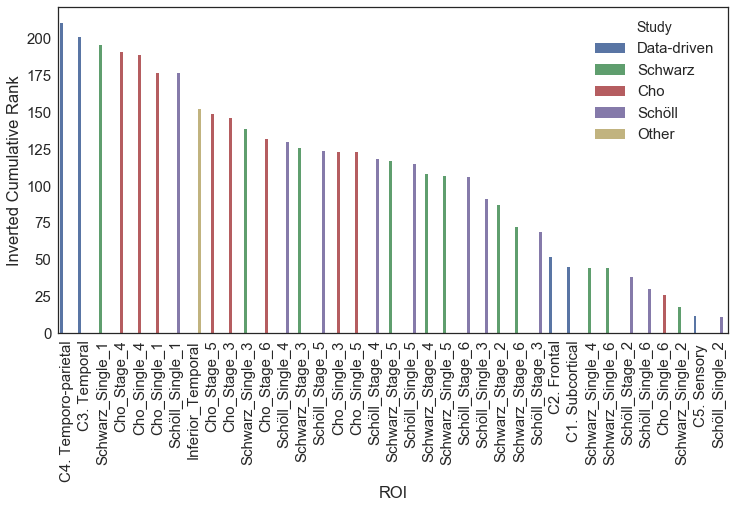

In [30]:
plt.close()
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('white')
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.barplot(x='dIndex',y='Inverted Cumulative Rank',data=abs_cum_rank.sort_values('Inverted Cumulative Rank',
                                                                                    ascending=False),hue='Study')
sns.plt.xlabel('ROI')
sns.plt.ylabel('Inverted Cumulative Rank')
for item in fig.get_xticklabels():
    item.set_rotation(90)
jnk = fig.get_figure()
jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/absolute_rankings.pdf',bbox_inches='tight')
plt.show()

In [33]:
## REPEATING ANALYSIS WITH ONLY MCI, AMYLOID POSITIVE SUBJECTS

In [37]:
cs_AD = cs.loc[[x for x in cs.index if x not in cs[(cs.DX_final=='MCI') & (cs.av45_status_wcb == 0)].index]]
jdf_AD = cs_AD[npreds+cov_cols[-3:]+ncols]
jdf_AD = cs_AD[gcols]

In [38]:
# A real quick check of the linear relationships since adding Lund ROIs
lin_res_AD = pandas.DataFrame(index=ncols)
for dv in npreds[:-1]:
    if dv in jdf_AD.columns:
        print('working on',dv)
    else:
        continue
    dat = jdf_AD[(ncols+[dv]+cov_cols[-3:])].dropna()
    for col in ncols:
        mod = smf.ols('%s ~ %s + %s + %s + %s'%(dv,cov_cols[-3],
                                               cov_cols[-2],
                                               cov_cols[-1],col),
                                              data=dat).fit()
        lin_res_AD.ix[col,'%s_t'%(dv)] = mod.tvalues[-1]
        lin_res_AD.ix[col,'%s_p'%(dv)] = mod.pvalues[-1]
        

working on CDRSB
working on ADAS11
working on ADAS13
working on FAQ
working on MOCA
working on EcogPtTotal
working on EcogSPTotal
working on MMSE
working on ADNI_MEM
working on ADNI_EF


In [119]:
lin_res_AD.sort_values('ADNI_EF_t',ascending=True)

,CDRSB_t,CDRSB_p,ADAS11_t,ADAS11_p,ADAS13_t,ADAS13_p,FAQ_t,FAQ_p,MOCA_t,MOCA_p,EcogPtTotal_t,EcogPtTotal_p,EcogSPTotal_t,EcogSPTotal_p,MMSE_t,MMSE_p,ADNI_MEM_t,ADNI_MEM_p,ADNI_EF_t,ADNI_EF_p
Cho_Single_1,3.796000,0.000337,3.490117,0.000887,2.694555,0.009024,2.345841,0.022145,-2.887304,0.005318,1.154386,0.252634,3.112829,0.002786,-1.617265,0.110740,-3.304288,0.001562,-2.185618,0.032510
Schöll_Single_1,3.796000,0.000337,3.490117,0.000887,2.694555,0.009024,2.345841,0.022145,-2.887304,0.005318,1.154386,0.252634,3.112829,0.002786,-1.617265,0.110740,-3.304288,0.001562,-2.185618,0.032510
Schwarz_Single_1,3.961867,0.000195,3.622047,0.000584,2.824576,0.006332,2.492630,0.015322,-3.008191,0.003774,1.228122,0.223899,3.270738,0.001742,-1.701685,0.093668,-3.496013,0.000864,-2.181644,0.032815
Schwarz_Single_3,3.233399,0.001962,2.809172,0.006607,2.087496,0.040894,2.241203,0.028545,-2.273212,0.026433,1.010834,0.315902,3.044945,0.003395,-1.688983,0.096089,-2.343962,0.022197,-2.019061,0.047674
Cho_Stage_3,3.311456,0.001551,2.896229,0.005187,2.167420,0.033990,2.321336,0.023517,-2.250166,0.027939,1.105939,0.272893,3.193359,0.002196,-1.446951,0.152791,-2.723035,0.008327,-1.828368,0.072155
Cho_Single_3,3.138875,0.002596,2.714220,0.008559,2.015540,0.048119,2.266729,0.026849,-2.075235,0.042054,1.073904,0.286898,3.137350,0.002592,-1.382582,0.171599,-2.548262,0.013237,-1.717856,0.090658
Inferior_Temporal,3.016134,0.003709,2.943590,0.004538,2.096479,0.040061,1.982575,0.051780,-2.112662,0.038599,0.497183,0.620764,3.003866,0.003821,-1.812594,0.074585,-1.973559,0.052753,-1.679045,0.098020
C3. Temporal,3.688699,0.000477,3.463897,0.000963,2.588983,0.011940,2.366519,0.021043,-2.543362,0.013446,1.047645,0.298743,3.263178,0.001782,-2.100374,0.039642,-2.489269,0.015411,-1.618500,0.110473
Schwarz_Stage_3,3.407727,0.001156,2.928811,0.004732,2.206637,0.030992,2.122379,0.037743,-2.293001,0.025197,1.211918,0.229999,2.976836,0.004129,-1.265755,0.210189,-2.780816,0.007114,-1.598543,0.114848
Cho_Stage_4,3.428419,0.001084,3.261272,0.001792,2.386867,0.020007,2.264637,0.026985,-2.345488,0.022164,0.732372,0.466615,3.282573,0.001680,-1.867916,0.066353,-2.357585,0.021463,-1.562475,0.123108


In [41]:
lin_res_AD.sort_index(inplace=True)
newind = lin_res_AD.index[:5].tolist() + ['C1. Subcortical','C2. Frontal','C3. Temporal','C4. Temporo-parietal', 'C5. Sensory '
                ] + ['Schöll_Single_%s'%x for x in range(1,7)] + ['Schöll_Stage_%s'%x for x in range(2,7)
                ] + ['Cho_Single_1'] + ['Cho_Single_%s'%x for x in range(3,7)] + ['Cho_Stage_%s'%x for x in range(3,7)
                ] + ['Inferior_Temporal'] + ['Lund_ET_%s'%x for x in range(1,7)
                                            ] + ['Schwarz_Single_%s'%x for x in range(1,7)] 
lin_res_AD.index = newind




In [42]:
for col in lin_res_AD.index[-12:-6]:
    lin_res_AD.drop(col,axis=0,inplace=True)

In [43]:
cogz = npreds[:3] + [npreds[7]] + npreds[10:12]
cum_rank = pandas.DataFrame(index = lin_res_AD.index, columns = cogz )
for cog in cogz:
    if cog == 'MMSE':
        jnk = lin_res_AD.loc[lin_res_AD.index[:]].sort_values('%s_t'%(cog),ascending=False)
        jnk['rank'] = range(len(jnk.index))
        for roi in jnk.index:
            cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']
    else:
        jnk = lin_res_AD.loc[lin_res_AD.index[:]].sort_values('%s_t'%(cog),ascending=True)
        jnk['rank'] = range(len(jnk.index))
        for roi in jnk.index:
            cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']

In [44]:
abs_lin_res_AD = abs(lin_res_AD)
cogz = npreds[:3] + [npreds[7]] + npreds[10:12]
abs_cum_rank = pandas.DataFrame(index = abs_lin_res_AD.index, columns = cogz )
for cog in cogz:
    jnk = abs_lin_res_AD.loc[abs_lin_res_AD.index[:]].sort_values('%s_t'%(cog),ascending=True)
    jnk['rank'] = range(len(jnk.index))
    for roi in jnk.index:
        abs_cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']

In [45]:
cum_rank['Inverted Cumulative Rank'] = cum_rank[cum_rank.columns[:6]].sum(axis=1).sort_values(ascending=False)
#cum_rank['mean_Inverted Cumulative Rank'] = cum_rank[cum_rank.columns[:6]].sum(axis=1).sort_values(ascending=False)
abs_cum_rank['Inverted Cumulative Rank'] = abs_cum_rank[abs_cum_rank.columns[:6]].sum(axis=1).sort_values(ascending=False)
cum_rank['dIndex'] = cum_rank.index
abs_cum_rank['dIndex'] = abs_cum_rank.index
cum_rank['Inverted Cumulative Rank']
abs_cum_rank['Inverted Cumulative Rank']

Schwarz_Stage_2          99.0
Schwarz_Stage_3         145.0
Schwarz_Stage_4         111.0
Schwarz_Stage_5         126.0
Schwarz_Stage_6          73.0
C1. Subcortical          41.0
C2. Frontal              47.0
C3. Temporal            200.0
C4. Temporo-parietal    210.0
C5. Sensory              13.0
Schöll_Single_1         184.0
Schöll_Single_2          11.0
Schöll_Single_3          95.0
Schöll_Single_4         133.0
Schöll_Single_5          95.0
Schöll_Single_6          31.0
Schöll_Stage_2           44.0
Schöll_Stage_3           76.0
Schöll_Stage_4          125.0
Schöll_Stage_5          122.0
Schöll_Stage_6           89.0
Cho_Single_1            186.0
Cho_Single_3            126.0
Cho_Single_4            183.0
Cho_Single_5            106.0
Cho_Single_6             27.0
Cho_Stage_3             154.0
Cho_Stage_4             188.0
Cho_Stage_5             142.0
Cho_Stage_6             121.0
Inferior_Temporal       146.0
Schwarz_Single_1        204.0
Schwarz_Single_2         24.0
Schwarz_Si

In [46]:
cum_rank.ix['Schöll_Single_1','Inverted Cumulative Rank'] = cum_rank.ix['Cho_Single_1','Inverted Cumulative Rank']
abs_cum_rank.ix['Schöll_Single_1','Inverted Cumulative Rank'] = abs_cum_rank.ix['Cho_Single_1','Inverted Cumulative Rank']
cum_rank['Study'] = ['Schwarz']*5 + ['Data-driven']*5 + ['Schöll']*11 + ['Cho']*9 + ['Other'] + ['Schwarz']*6
abs_cum_rank['Study'] = ['Schwarz']*5 + ['Data-driven']*5 + ['Schöll']*11 + ['Cho']*9 + ['Other'] + ['Schwarz']*6

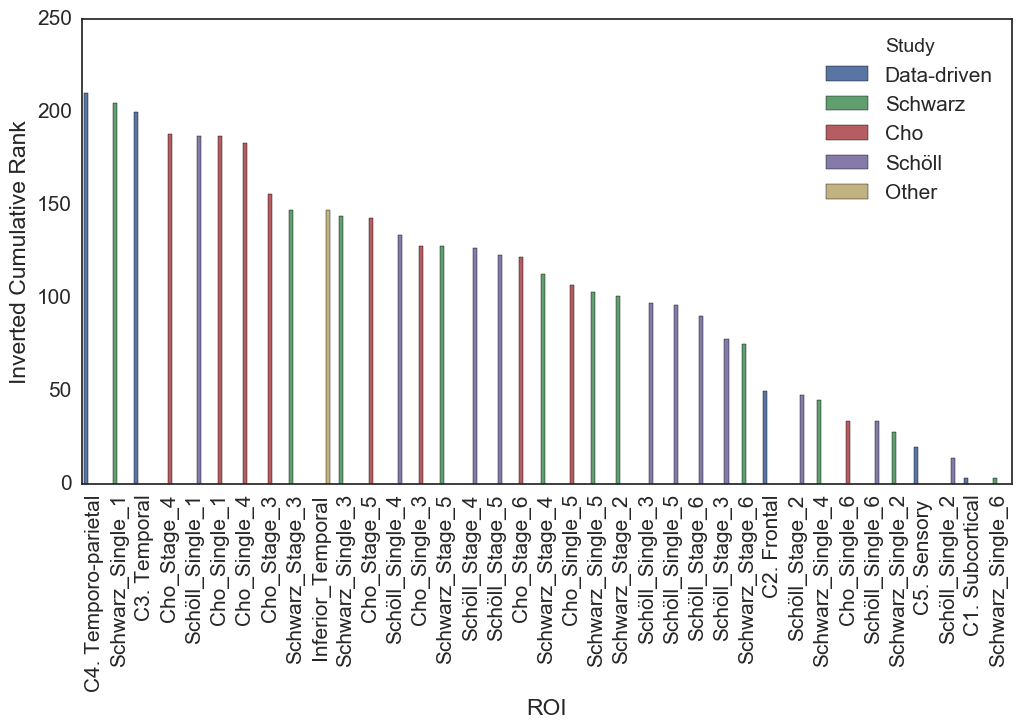

In [47]:
plt.close()
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('white')
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.barplot(x='dIndex',y='Inverted Cumulative Rank',data=cum_rank.sort_values('Inverted Cumulative Rank',
                                                                                    ascending=False),hue='Study')
sns.plt.xlabel('ROI')
sns.plt.ylabel('Inverted Cumulative Rank')
for item in fig.get_xticklabels():
    item.set_rotation(90)
jnk = fig.get_figure()
jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/rankings_only_MCIpos.pdf')
plt.show()

In [31]:
jnk = deepcopy(a_indata)
jnk.ix[:,'sumx'] = jnk[ncols].sum(axis=1)
n_indata = deepcopy(a_indata)
bcols = [x for x in ncols[:40] if 'age_1' not in x]


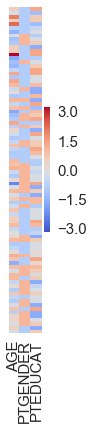

In [32]:
plt.close()
jnk1 = jnk[cov_cols[-3:]]
jnk1 = (jnk1-np.mean(jnk1))/np.std(jnk1)
fig, ax = plt.subplots(figsize=(.75,6))
fig = sns.heatmap(jnk1.loc[jnk.sort_values('sumx').index].astype(float),
            yticklabels=False,cmap="coolwarm")
#junk = fig.get_figure()
#junk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/cov_features.pdf',
#           bbox_inches='tight')
plt.show()

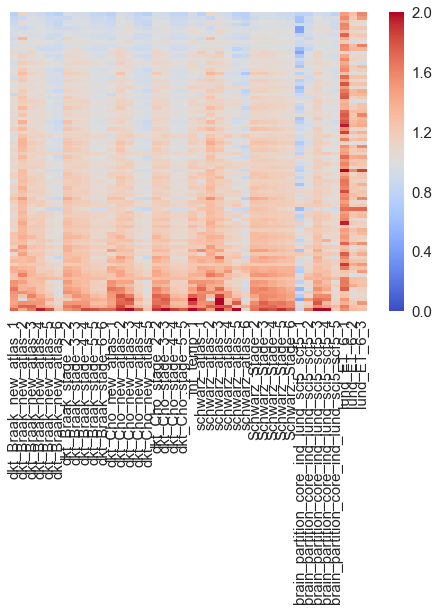

In [33]:
plt.close()
fig = sns.heatmap(n_indata.loc[jnk.sort_values('sumx').index][bcols],
            yticklabels=False,cmap="coolwarm",vmin=0,vmax=2)
#jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/features.pdf',
#            bbox_inches='tight')
plt.show()

In [34]:
def lasso_feat_select(indata, xcols, ycol, cv = False, folds = 10,
                      thr = 0.25, delt = 0.1, max_feat = 6, scale=False,
                      clf = linear_model.LassoCV(max_iter=100000,cv=10),
                      plt_min = 0, plt_max = 100, mod_predict = False
                     ):
    
    if cv == False:
        clf = clf
        n_x = indata[xcols].dropna()
        n_y = indata.loc[n_x.index][ycol].dropna()
        n_yin = n_y.values
        n_x = n_x.loc[n_y.index]
        n_xin = n_x.values
        if scale:
            s_tfm = StandardScaler().fit(n_xin)
            n_xin = s_tfm.transform(n_xin)
        # Set a minimum threshold of 0.25
        las = clf.fit(n_xin,n_yin)
        if mod_predict:
            acc = las.score(n_xin,n_yin)
            print('prediction accuracy = ',acc)
        sfm = SelectFromModel(clf, threshold=thr)
        sfm.fit(n_xin, n_yin)
        n_features = sfm.transform(n_xin).shape[1]
        print('there are %s features'%(n_features))
        while n_features > max_feat:
            sfm.threshold += delt
            X_transform = sfm.transform(n_xin)
            n_features = X_transform.shape[1]
        
        selected = []
        if scale:
            n_xin = s_tfm.inverse_transform(n_xin)
        newx = sfm.transform(n_xin)
        print('selected = ',newx.shape[-1])
        for i in range(newx.shape[-1]):
            arr = newx[:,i]
            for col in xcols:
                if np.allclose(indata.loc[n_x.index][col].values,arr):
                    selected.append(col)
        
        try:
            print('model alpha selected =',clf.fit(n_xin, n_yin).alpha_)
            print("Computing regularization path using the coordinate descent lasso...")
            model = clf.fit(n_xin, n_yin)

            # Display results
            m_log_alphas = -np.log10(model.alphas_)
            #m_log_alphas = model.alphas_

            plt.close()
            fig = plt.figure()
            ymin, ymax = plt_min, plt_max
            plt.plot(m_log_alphas, model.mse_path_, ':')
            plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
                     label='Average across the folds', linewidth=2)
            plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
                        linewidth=2, label='alpha: CV estimate')
            #plt.axvline(model.alpha_, linestyle='--', color='k',
            #            linewidth=2, label='alpha: CV estimate')
            
            plt.legend()

            plt.xlabel('-log(alpha)')
            #plt.xlabel('alpha')
            plt.ylabel('Mean square error')
            plt.title('Mean square error on each fold')
            plt.axis('tight')
            plt.ylim(ymin, ymax)
            plt.show()
            return selected, fig, las
        except:
            return selected

    else:
        kf = KFold(n_splits=folds)
        selected = {}
        nfeats = []
        for train_index,test_index in kf.split(indata):
            clf = clf
            n_xin = indata[xcols].values[train_index]
            n_yin = indata[ycol].values[train_index]
            # Set a minimum threshold of 0.25
            sfm = SelectFromModel(clf, threshold=thr)
            sfm.fit(n_xin, n_yin)
            n_features = sfm.transform(n_xin).shape[1]
            print('there are %s features'%(n_features))
            while n_features > max_feat:
                sfm.threshold += delt
                X_transform = sfm.transform(n_xin)
                n_features = X_transform.shape[1]

            newx = sfm.transform(n_xin)
            scols = []
            print('selected = ',newx.shape[-1])
            nfeats.append(newx.shape[-1])
            for i in range(newx.shape[-1]):
                arr = newx[:,i]
                for col in xcols:
                    if np.allclose(indata[col].values[train_index],arr):
                        scols.append(col)
            for col in scols:
                if col in selected.keys():
                    selected.update({col: selected[col] + 1})
                else:
                    selected.update({col: 1})
            
        return selected,nfeats

In [35]:
code = dict(zip(jdf.PTGENDER.unique(),range(2)))
jdf.PTGENDER = [code[jdf.ix[x,'PTGENDER']] for x in jdf.index]
jdf.PTGENDER

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0     0
1     1
2     0
3     1
4     0
5     0
6     0
7     1
8     1
9     0
10    1
11    1
12    1
13    1
14    0
15    0
16    0
17    1
18    1
19    0
20    1
21    1
22    0
23    1
24    0
25    0
26    1
27    1
28    0
29    0
     ..
60    0
61    0
62    1
63    0
64    0
65    0
66    1
67    1
68    1
69    0
70    0
71    1
72    0
73    1
74    1
75    1
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    1
84    0
85    1
86    0
87    1
88    0
89    0
Name: PTGENDER, dtype: int64

prediction accuracy =  0.231793197488
there are 4 features
selected =  4
model alpha selected = 2.11046585027
Computing regularization path using the coordinate descent lasso...


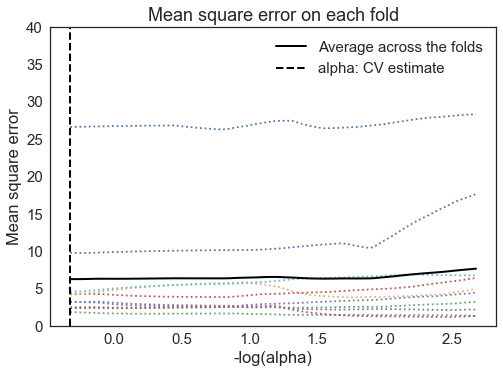

['schwarz_atlas_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'PTEDUCAT']

In [36]:
selected,fig, las = lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'MMSE',
                                      scale=True,plt_min=0,plt_max=40,mod_predict=True,
                                      )
selected

In [37]:
eq = 'MMSE ~'
for col in selected:
    if col == selected[-1]:
        eq = eq + ' %s'%col
    else:
        eq = eq + ' %s +'%col
 
lmod = smf.ols(eq,data=jdf).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MMSE   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     6.800
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           8.62e-05
Time:                        17:53:15   Log-Likelihood:                -194.49
No. Observations:                  89   AIC:                             399.0
Df Residuals:                      84   BIC:                             411.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    21.9542      2.781      7.893      0.000      16.423      27.485
schwarz_atlas_6                               7.1541      2.207      3.242      0.002       2.766      11.542
brain_partition_core_ind_lund_sci5_scf5_1     1.9587      1.366      1.434      0.155      -0.757       4.675
brain_partition_core_ind_lund_sci5_scf5_4    -5.4151      1.403     -3.859      0.000      -8.206      -2.624
PTEDUCAT                                      0.2310      0.091      2.527      0.013       0.049       0.413
==============================================================================
Omnibus:                       77.967   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.118
Skew:                          -2.683   Prob(JB):                    3.78e-150
Kurtosis:                      15.521   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
clus4_resid = smf.ols(
    'brain_partition_core_ind_lund_sci5_scf5_4 ~ brain_partition_core_ind_lund_sci5_scf5_1 + schwarz_atlas_6 + PTEDUCAT',
                     data=a_indata).fit().resid
scw6_resid = smf.ols(
    'schwarz_atlas_6 ~ brain_partition_core_ind_lund_sci5_scf5_4 + brain_partition_core_ind_lund_sci5_scf5_1',
                    data=a_indata).fit().resid
clus1_resid = smf.ols(
    'brain_partition_core_ind_lund_sci5_scf5_1 ~ brain_partition_core_ind_lund_sci5_scf5_4 + schwarz_atlas_6', 
                    data=a_indata).fit().resid

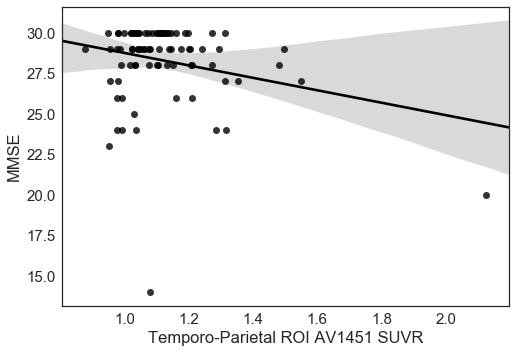

In [39]:
plt.close()
fig = sns.regplot(a_indata.brain_partition_consensus_ind_lund_sci5_scf5_4,adni_y,color='k')
fig.set(xlabel='Temporo-Parietal ROI AV1451 SUVR',ylabel='MMSE')
plt.show()

In [40]:
jdf1 = jdf[selected + ['MMSE']].dropna()
jdf1.columns

Index(['schwarz_atlas_6', 'brain_partition_core_ind_lund_sci5_scf5_1',
       'brain_partition_core_ind_lund_sci5_scf5_4', 'PTEDUCAT', 'MMSE'],
      dtype='object')

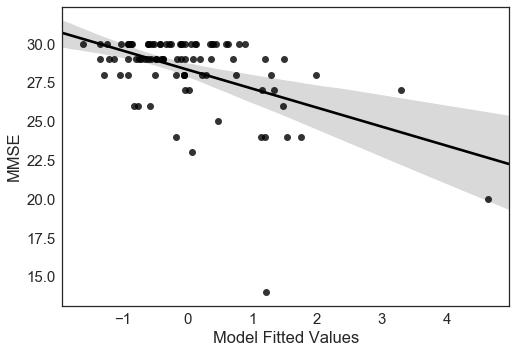

In [41]:
zfit = (lmod.fittedvalues - np.mean(lmod.fittedvalues)) / np.std(lmod.fittedvalues)
plt.close()
fig = sns.regplot((zfit*-1),jdf1['MMSE'].values,color='k')
fig.set(xlabel='Model Fitted Values',ylabel='MMSE')
#jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/association_edu.pdf',
#            bbox_inches='tight')
plt.show()

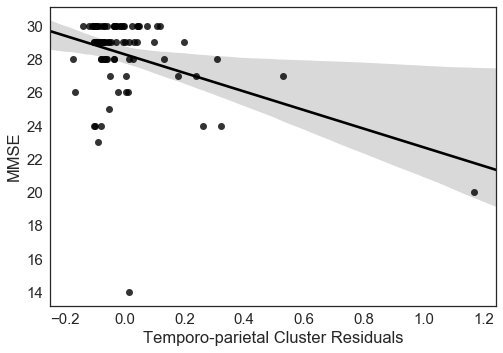

In [42]:
plt.close()
fig = sns.regplot(clus4_resid,a_indata['MMSE'].values,color='k')
fig.set(xlabel='Temporo-parietal Cluster Residuals',ylabel='MMSE')
jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/association2_edu.pdf',
#            bbox_inches='tight')
plt.show()

In [71]:
### NOW AGAIN WITH ONLY THE MCI AMYLOID POSITIVE

In [73]:
code = dict(zip(jdf_AD.PTGENDER.unique(),range(2)))
jdf_AD.PTGENDER = [code[jdf_AD.ix[x,'PTGENDER']] for x in jdf_AD.index]
jdf_AD.PTGENDER

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


1     0
2     1
3     0
4     1
6     1
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    0
18    0
21    0
25    1
26    0
27    0
29    1
30    1
31    1
32    0
33    0
34    1
35    1
36    1
37    0
     ..
50    1
51    0
54    1
55    1
56    0
57    0
58    1
59    0
60    1
61    1
62    0
63    1
65    1
67    0
69    1
72    1
73    0
76    1
77    1
78    1
79    1
81    1
82    1
83    0
84    1
85    0
86    1
87    0
88    1
89    1
Name: PTGENDER, dtype: int64

prediction accuracy =  0.249698929714
there are 4 features
selected =  4
model alpha selected = 1.45242596093
Computing regularization path using the coordinate descent lasso...


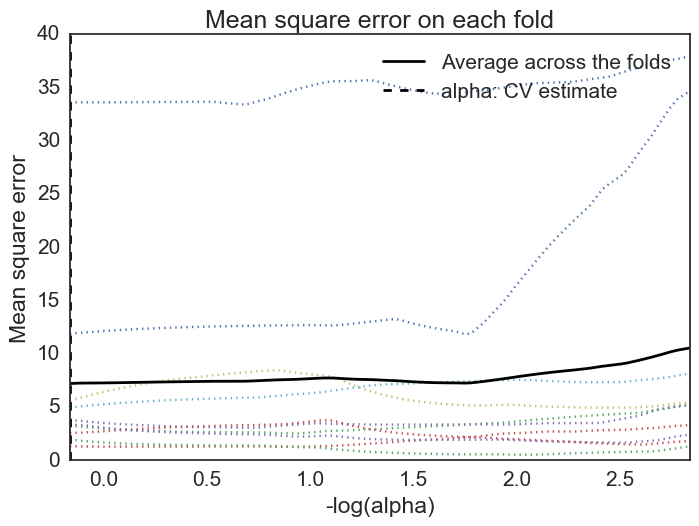

['schwarz_atlas_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'PTEDUCAT']

In [74]:
selected,fig, las = lasso_feat_select(jdf_AD,ncols[:-6]+cov_cols[-3:],'MMSE',
                                      scale=True,plt_min=0,plt_max=40,mod_predict=True,
                                      )
selected

In [76]:
eq = 'MMSE ~'
for col in selected:
    if col == selected[-1]:
        eq = eq + ' %s'%col
    else:
        eq = eq + ' %s +'%col
 
lmod = smf.ols(eq,data=jdf_AD).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MMSE   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     5.786
Date:                Thu, 26 Oct 2017   Prob (F-statistic):           0.000487
Time:                        01:09:12   Log-Likelihood:                -153.87
No. Observations:                  69   AIC:                             317.7
Df Residuals:                      64   BIC:                             328.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    21.2529      3.287      6.466      0.000      14.687      27.819
schwarz_atlas_6                               7.3372      2.519      2.912      0.005       2.304      12.370
brain_partition_core_ind_lund_sci5_scf5_1     2.1906      1.728      1.268      0.209      -1.261       5.642
brain_partition_core_ind_lund_sci5_scf5_4    -5.5020      1.509     -3.646      0.001      -8.517      -2.487
PTEDUCAT                                      0.2613      0.110      2.386      0.020       0.043       0.480
==============================================================================
Omnibus:                       67.325   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              559.975
Skew:                          -2.750   Prob(JB):                    2.53e-122
Kurtosis:                      15.827   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
lmod.bse

Intercept                                    3.286841
schwarz_atlas_6                              2.519487
brain_partition_core_ind_lund_sci5_scf5_1    1.727733
brain_partition_core_ind_lund_sci5_scf5_4    1.509222
PTEDUCAT                                     0.109510
dtype: float64

In [77]:
clus4_resid = smf.ols(
    'brain_partition_core_ind_lund_sci5_scf5_4 ~ brain_partition_core_ind_lund_sci5_scf5_1 + schwarz_atlas_6 + PTEDUCAT',
                     data=jdf_AD).fit().resid
scw6_resid = smf.ols(
    'schwarz_atlas_6 ~ brain_partition_core_ind_lund_sci5_scf5_4 + brain_partition_core_ind_lund_sci5_scf5_1',
                    data=jdf_AD).fit().resid
clus1_resid = smf.ols(
    'brain_partition_core_ind_lund_sci5_scf5_1 ~ brain_partition_core_ind_lund_sci5_scf5_4 + schwarz_atlas_6', 
                    data=jdf_AD).fit().resid

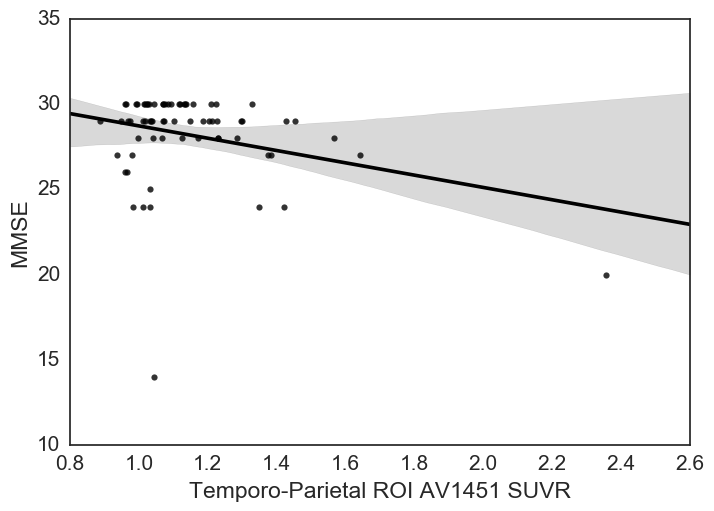

In [81]:
plt.close()
fig = sns.regplot(jdf_AD.brain_partition_core_ind_lund_sci5_scf5_4,jdf_AD.MMSE,color='k')
fig.set(xlabel='Temporo-Parietal ROI AV1451 SUVR',ylabel='MMSE')
plt.show()

In [82]:
jdf1_AD = jdf_AD[selected + ['MMSE']].dropna()
jdf1_AD.columns

Index(['schwarz_atlas_6', 'brain_partition_core_ind_lund_sci5_scf5_1',
       'brain_partition_core_ind_lund_sci5_scf5_4', 'PTEDUCAT', 'MMSE'],
      dtype='object')

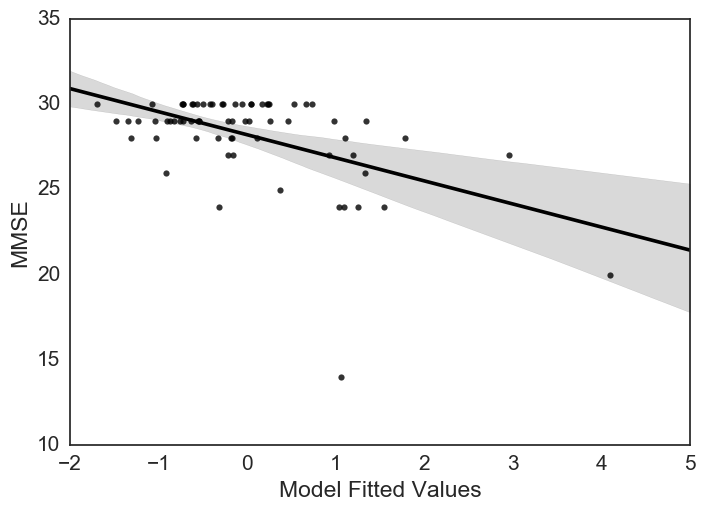

In [83]:
zfit = (lmod.fittedvalues - np.mean(lmod.fittedvalues)) / np.std(lmod.fittedvalues)
plt.close()
fig = sns.regplot((zfit*-1),jdf1_AD['MMSE'].values,color='k')
fig.set(xlabel='Model Fitted Values',ylabel='MMSE')
#jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/association_edu.pdf',
#            bbox_inches='tight')
plt.show()

prediction accuracy =  0.211164516568
there are 1 features
selected =  1
model alpha selected = 0.0112987867421
Computing regularization path using the coordinate descent lasso...


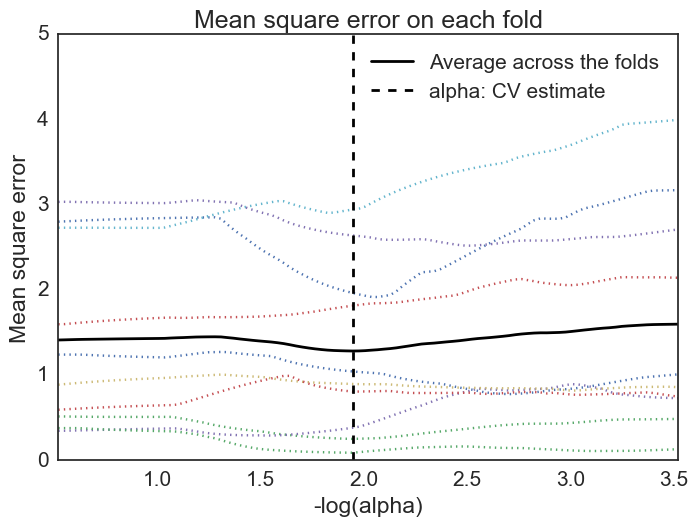

(['brain_partition_core_ind_lund_sci5_scf5_4'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [84]:
lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'CDRSB',
                  scale=True,plt_min=0,plt_max=5,mod_predict=True)

prediction accuracy =  0.260720049147
there are 4 features
selected =  4
model alpha selected = 0.0679371452927
Computing regularization path using the coordinate descent lasso...


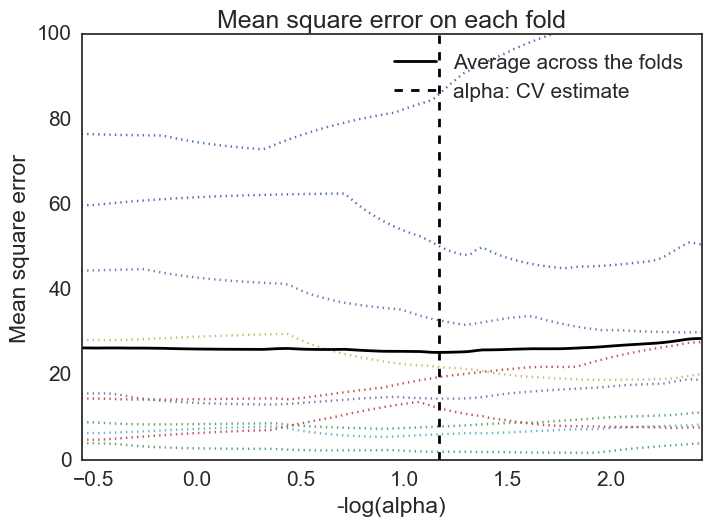

(['schwarz_atlas_1',
  'schwarz_atlas_6',
  'brain_partition_core_ind_lund_sci5_scf5_4',
  'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [85]:
lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'ADAS11',
                  scale=True,plt_min=0,plt_max=100, mod_predict=True)

prediction accuracy =  0.210258046943
there are 6 features
selected =  6
model alpha selected = 0.64440394288
Computing regularization path using the coordinate descent lasso...


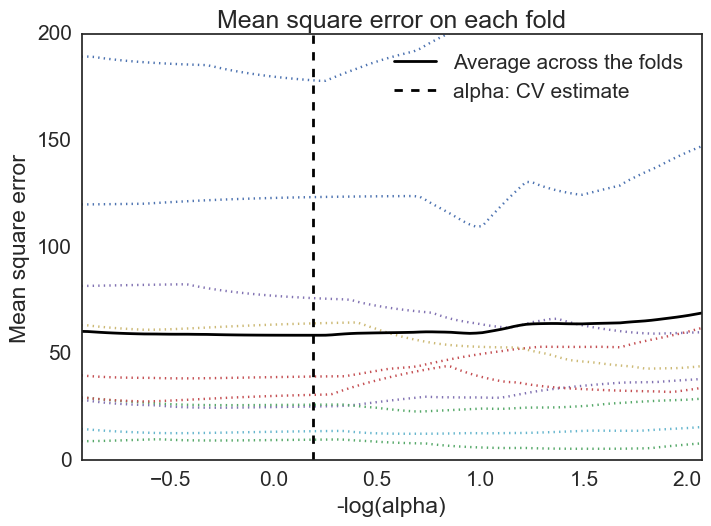

(['dkt_Braak_new_atlas_2',
  'schwarz_atlas_1',
  'schwarz_atlas_6',
  'brain_partition_core_ind_lund_sci5_scf5_4',
  'AGE',
  'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [86]:
lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'ADAS13',scale=True,plt_min=0,plt_max=200,mod_predict=True)

prediction accuracy =  0.231263169615
there are 4 features
selected =  4
model alpha selected = 0.0475706079092
Computing regularization path using the coordinate descent lasso...


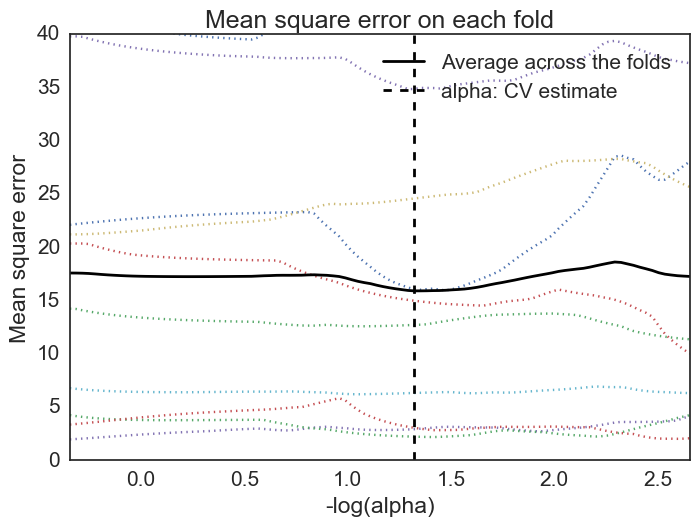

(['schwarz_atlas_1',
  'schwarz_atlas_6',
  'brain_partition_core_ind_lund_sci5_scf5_4',
  'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [87]:
lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'FAQ',scale=True,plt_min=0,plt_max=40, mod_predict=True)

prediction accuracy =  0.288042091374
there are 1 features
selected =  1
model alpha selected = 0.000715722741172
Computing regularization path using the coordinate descent lasso...


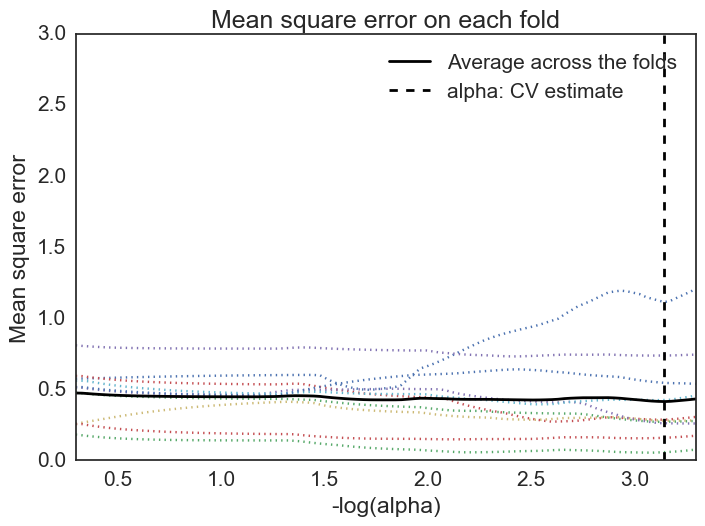

(['brain_partition_core_ind_lund_sci5_scf5_4'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [88]:
lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'EcogSPTotal',scale=True,plt_min=0,plt_max=3,mod_predict=True)

In [89]:
#### AND AGAIN WITH ONLY Amyloid POSITIVE MCI

prediction accuracy =  0.332498599583
there are 3 features
selected =  3
model alpha selected = 0.012798213131
Computing regularization path using the coordinate descent lasso...


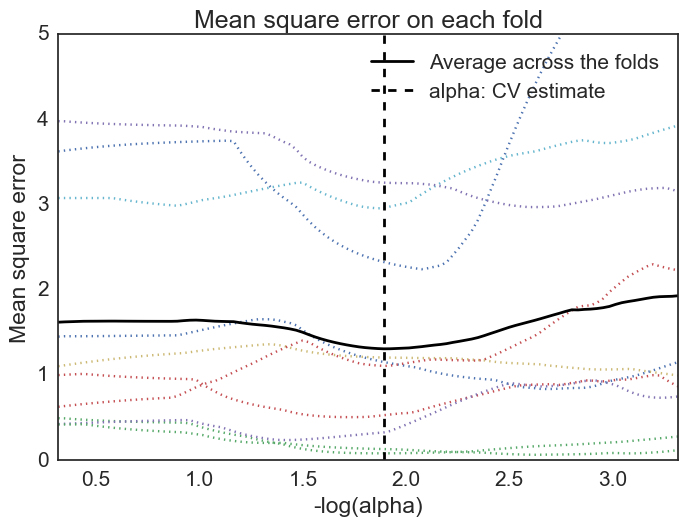

(['schwarz_atlas_1',
  'schwarz_atlas_6',
  'brain_partition_core_ind_lund_sci5_scf5_4'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [90]:
lasso_feat_select(jdf_AD,ncols[:-6]+cov_cols[-3:],'CDRSB',
                  scale=True,plt_min=0,plt_max=5,mod_predict=True)

prediction accuracy =  0.29339025165
there are 4 features
selected =  4
model alpha selected = 0.0817244352282
Computing regularization path using the coordinate descent lasso...


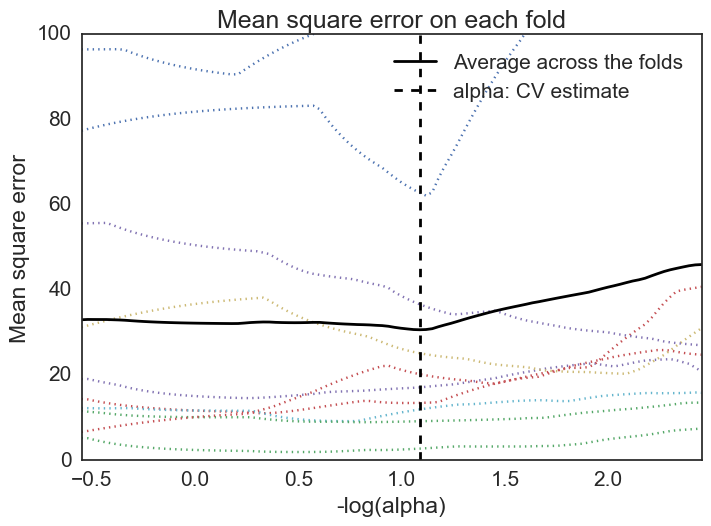

(['schwarz_atlas_1',
  'schwarz_atlas_6',
  'brain_partition_core_ind_lund_sci5_scf5_4',
  'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [91]:
lasso_feat_select(jdf_AD,ncols[:-6]+cov_cols[-3:],'ADAS11',
                  scale=True,plt_min=0,plt_max=100, mod_predict=True)

prediction accuracy =  0.209690843313
there are 4 features
selected =  4
model alpha selected = 0.765503135078
Computing regularization path using the coordinate descent lasso...


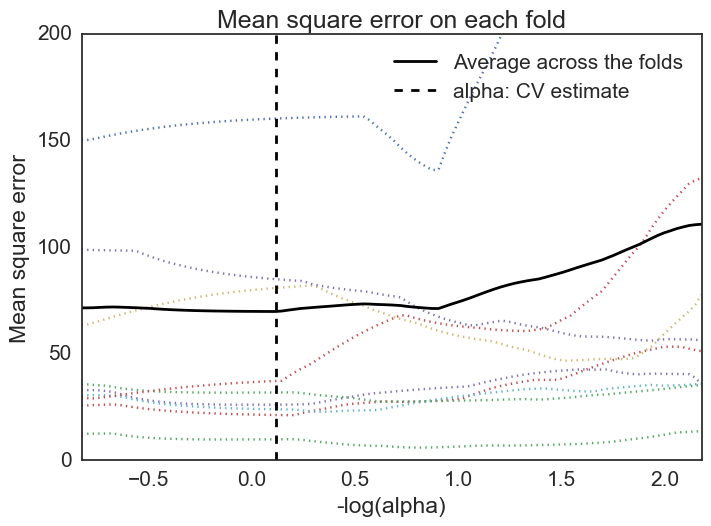

(['schwarz_atlas_1',
  'schwarz_atlas_6',
  'brain_partition_core_ind_lund_sci5_scf5_4',
  'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [94]:
lasso_feat_select(jdf_AD,ncols[:-6]+cov_cols[-3:],'ADAS13',scale=True,plt_min=0,plt_max=200,mod_predict=True)

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


prediction accuracy =  0.235054151326


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


there are 5 features
selected =  5
model alpha selected = 0.0550676115949
Computing regularization path using the coordinate descent lasso...


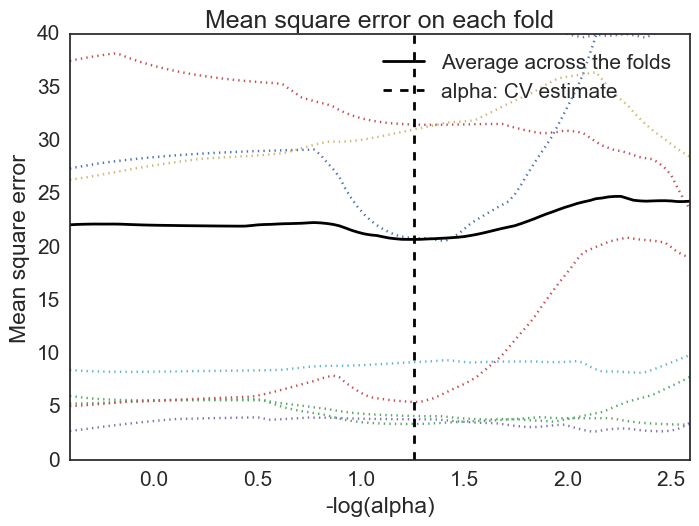

(['dkt_Braak_new_atlas_3',
  'schwarz_atlas_1',
  'schwarz_atlas_6',
  'brain_partition_core_ind_lund_sci5_scf5_4',
  'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [95]:
lasso_feat_select(jdf_AD,ncols[:-6]+cov_cols[-3:],'FAQ',scale=True,plt_min=0,plt_max=40, mod_predict=True)

prediction accuracy =  0.234364403993


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


there are 0 features
selected =  0
model alpha selected = 0.0213941704649
Computing regularization path using the coordinate descent lasso...


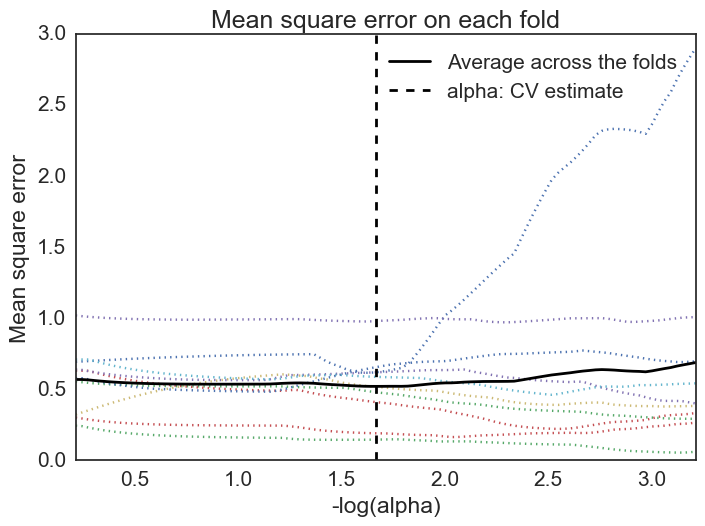

([],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [96]:
lasso_feat_select(jdf_AD,ncols[:-6]+cov_cols[-3:],'EcogSPTotal',scale=True,plt_min=0,plt_max=3,mod_predict=True)

# LATER ON ANALYSIS:
First, the subject-wise clustering

In [70]:
from importlib import reload
reload(vb)

<module 'vogel_basc' from '/Users/jakevogel/git/data_driven_pathology/vogel_basc.py'>

In [43]:
sys.path.insert(0,'/Users/jakevogel/git/data_driven_pathology/')
import vogel_basc as vb

In [44]:
vcols = [x for x in n_indata.columns if 'core_ind' in x]

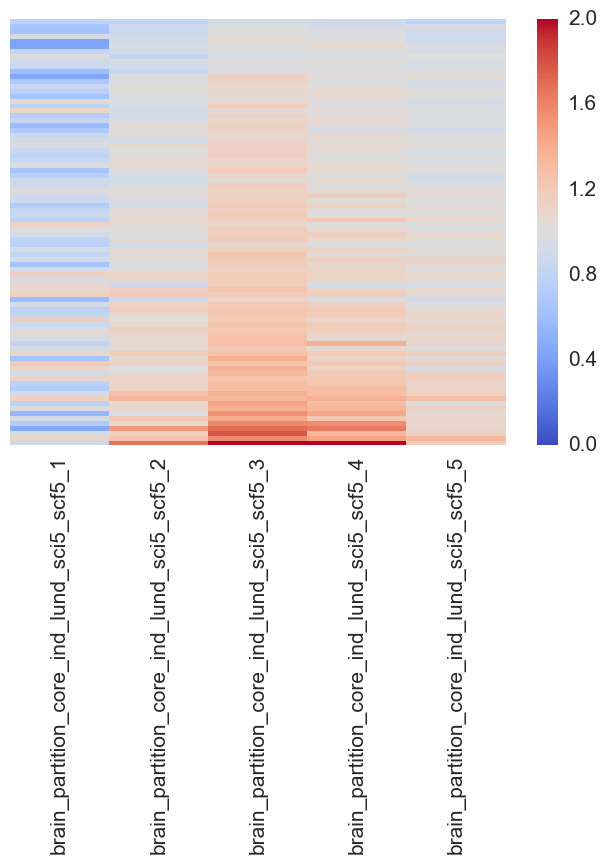

In [47]:
plt.close()
sns.heatmap(n_indata.loc[jnk.sort_values('sumx').index][vcols],
            yticklabels=False,cmap="coolwarm",vmin=0,vmax=2)
plt.show()

running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
working on iteration 500
working on iteration 600
working on iteration 700
working on iteration 800
working on iteration 900
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
working on iteration 500
working on iteration 600
working on iteration 700
working on iteration 800
working on iteration 900


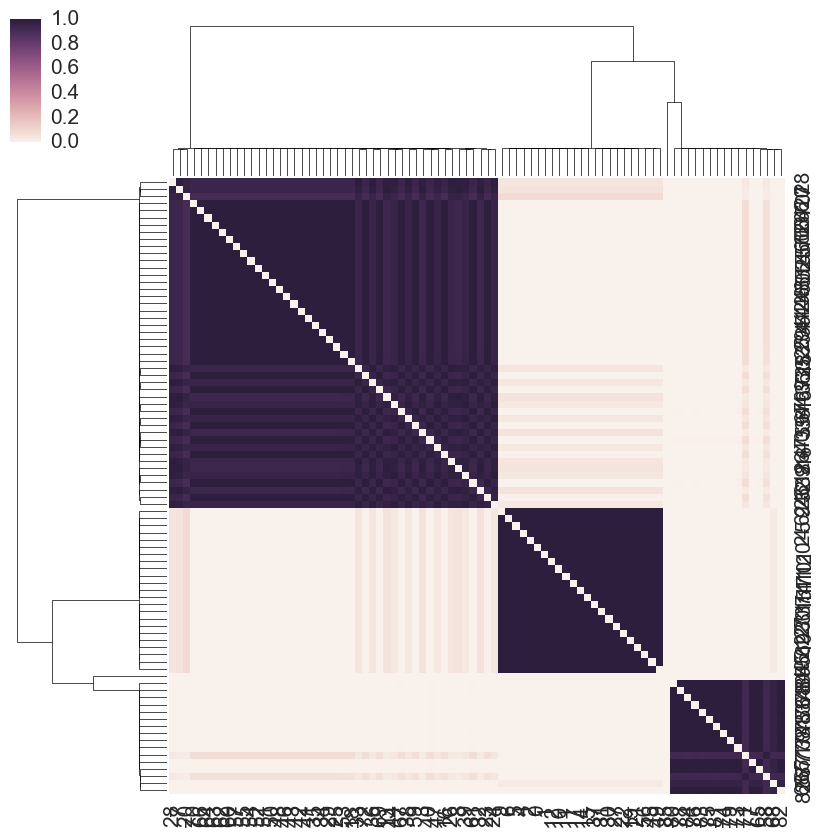

In [88]:
output = vb.poormans_basc(n_indata.loc[jnk.sort_values('sumx').index][vcols], 4, 1000, 100, True)

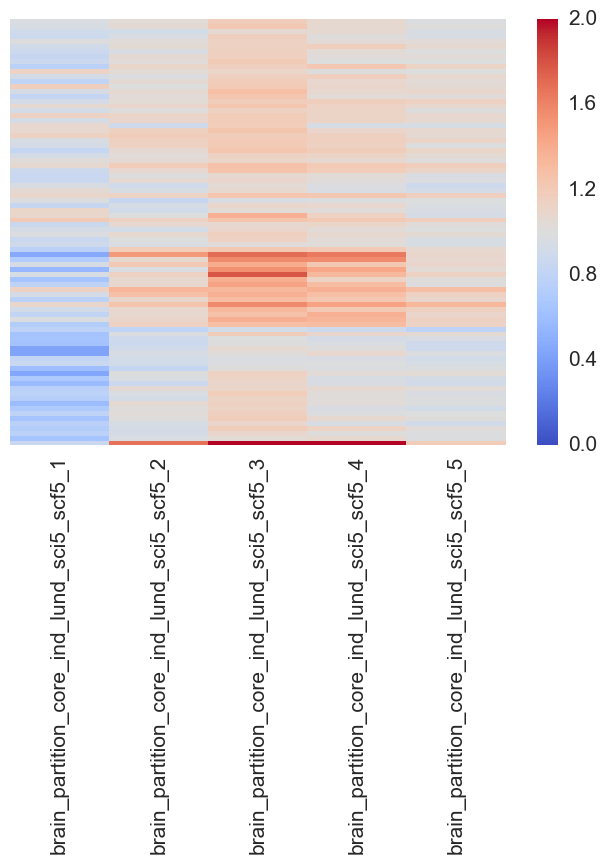

In [85]:
plt.close()
sns.heatmap(output[1].loc[output[1].sort_values('order').index][output[1].columns[:-1]],
            yticklabels=False,cmap="coolwarm",vmin=0,vmax=2)
plt.show()

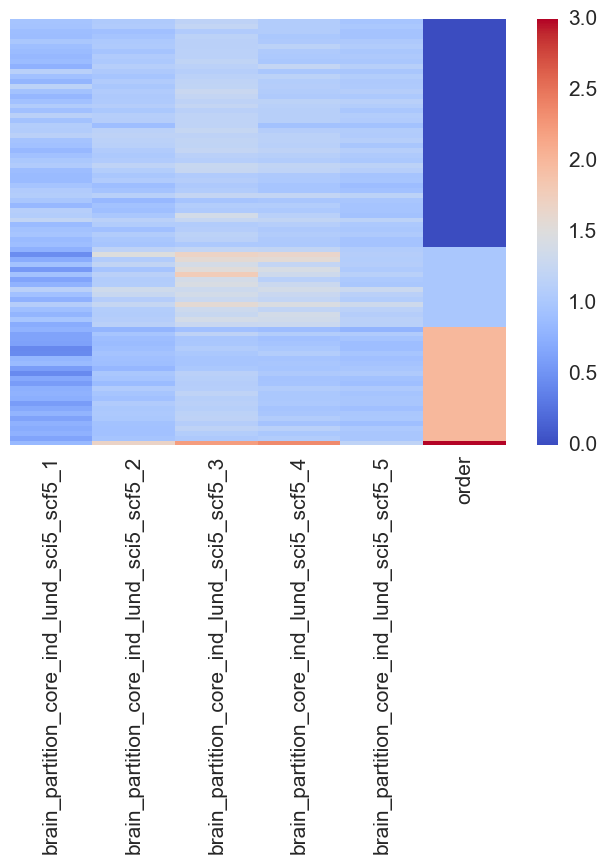

In [86]:
plt.close()
sns.heatmap(output[1].loc[output[1].sort_values('order').index],
            yticklabels=False,cmap="coolwarm",vmin=0)
plt.show()

In [74]:
clus_data = n_indata.loc[jnk.sort_values('sumx').index]

In [75]:
clus_data['cluster'] = output[1]['order']

In [78]:
clus_data.columns[-9:]

Index(['AGE', 'PTGENDER', 'PTEDUCAT', 'MMSE', 'ADNI_MEM', 'ADNI_EF',
       'DX_final', 'av45_status_wcb', 'cluster'],
      dtype='object')

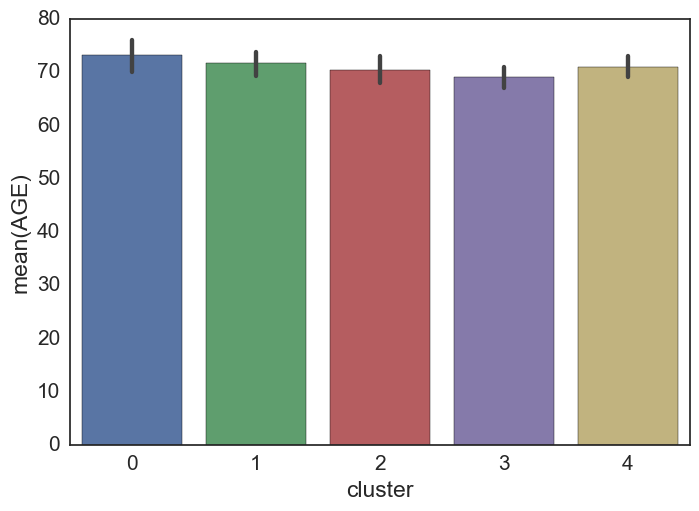

In [83]:
plt.close()
sns.barplot('cluster','AGE',data=clus_data)
plt.show()

It's got promise but probably not for the paper. Let's move on to...
## Hippocampus analysis

In [45]:
from glob import glob
import nibabel as ni

In [46]:
scans = sorted(glob('/Users/jakevogel/Science/tau/nan_sn*'))
dkt = ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1mm.nii.gz').get_data().astype(int)
basc = ni.load('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/brain_partition_core_ind_lund_sci5_scf5.nii.gz'
              ).get_data().astype(int)
basc2 = ni.load('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/brain_partition_consensus_ind_lund_sci5_scf5.nii.gz'
              ).get_data().astype(int)


In [47]:
len(hipp[nhipp==1])/len(hipp[hipp==1])

NameError: name 'hipp' is not defined

In [196]:
len(hipp[bhipp==1])/len(hipp[hipp==1])

0.0005299768135144088

In [49]:
nhipp_cons = np.zeros_like(hipp)
nhipp_cons[hipp==1] = 1
nhipp_cons[basc2!=3] = 0

bhipp_cons = np.zeros_like(hipp)
bhipp_cons[hipp==1] = 1
bhipp_cons[basc2!=1] = 0

In [198]:
len(hipp[nhipp_cons==1])/len(hipp[hipp==1])

0.23424975157336866

In [199]:
len(hipp[bhipp_cons==1])/len(hipp[hipp==1])

0.3468035773434912

In [50]:
# VOXEL PERCENTAGES
print('% hipp voxels in Cluster 1 (core)', len(hipp[nhipp==1])/len(hipp[hipp==1]))
print('% hipp voxels in Cluster 3 (core)',len(hipp[bhipp==1])/len(hipp[hipp==1]))
print('% hipp voxels in Cluster 1 (total)',len(hipp[nhipp_cons==1])/len(hipp[hipp==1]))
print('% hipp voxels in Cluster 3 (total)',len(hipp[bhipp_cons==1])/len(hipp[hipp==1]))

% hipp voxels in Cluster 1 (core) 0.10142431268631998
% hipp voxels in Cluster 3 (core) 0.0005299768135144088
% hipp voxels in Cluster 1 (total) 0.23424975157336866
% hipp voxels in Cluster 3 (total) 0.3468035773434912


In [51]:
# Now using only voxels that are available (i.e. not masked)
# VOXEL PERCENTAGES
print('% hipp voxels in Cluster 1 (core)', len(hipp[nhipp==1])/len(hipp[(nhipp_cons==1) | (bhipp_cons==1)]))
print('% hipp voxels in Cluster 3 (core)',len(hipp[bhipp==1])/len(hipp[(nhipp_cons==1) | (bhipp_cons==1)]))
print('% hipp voxels in Cluster 1 (total)',len(hipp[nhipp_cons==1])/len(hipp[(nhipp_cons==1) | (bhipp_cons==1)]))
print('% hipp voxels in Cluster 3 (total)',len(hipp[bhipp_cons==1])/len(hipp[(nhipp_cons==1) | (bhipp_cons==1)]))

% hipp voxels in Cluster 1 (core) 0.1745525025652719
% hipp voxels in Cluster 3 (core) 0.0009120966822483183
% hipp voxels in Cluster 1 (total) 0.4031467335537567
% hipp voxels in Cluster 3 (total) 0.5968532664462433


In [48]:
# Make hipp mask
hipp = np.zeros_like(dkt)
hipp[dkt==36] = 1
hipp[dkt==75] = 1

#save
nimg = ni.Nifti1Image(hipp,ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1mm.nii.gz').affine)
nimg.to_filename('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/hippocampus')

# mask further with basc
nhipp = np.zeros_like(hipp)
nhipp[hipp==1] = 1
nhipp[basc!=3] = 0

# save mask
nimg = ni.Nifti1Image(nhipp,ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1mm.nii.gz').affine)
nimg.to_filename('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/maskd_hippocampus')

# get the other side
bhipp = np.zeros_like(hipp)
bhipp[hipp==1] = 1
bhipp[basc!=1] = 0
nimg = ni.Nifti1Image(bhipp,ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1mm.nii.gz').affine)
nimg.to_filename('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/bad_hippocampus')

In [52]:
for scan in scans:
    sid = scan.split('/')[5].split('_')[2]
    dat = ni.load(scan).get_data()
    hippdf.ix[sid, 'new_hipp_tau_cons'] = np.nanmean(dat[nhipp_cons==1])
    hippdf.ix[sid, 'bad_hipp_tau_cons'] = np.nanmean(dat[bhipp_cons==1])

NameError: name 'hippdf' is not defined

In [53]:
# extract values
hippdf = pandas.DataFrame(index = [x.split('/')[5].split('_')[2] for x in scans], 
                          columns = ['hipp_tau','new_hipp_tau'])
for scan in scans:
    sid = scan.split('/')[5].split('_')[2]
    dat = ni.load(scan).get_data()
    hippdf.ix[sid, 'hipp_tau'] = np.nanmean(dat[hipp==1])
    hippdf.ix[sid, 'new_hipp_tau'] = np.nanmean(dat[nhipp==1])
    hippdf.ix[sid, 'bad_hipp_tau'] = np.nanmean(dat[bhipp==1])
    hippdf.ix[sid, 'new_hipp_tau_cons'] = np.nanmean(dat[nhipp_cons==1])
    hippdf.ix[sid, 'bad_hipp_tau_cons'] = np.nanmean(dat[bhipp_cons==1])
    print('finished subject',sid)
#scans[0]

finished subject 002-S-4229
finished subject 002-S-4262
finished subject 002-S-4521
finished subject 002-S-4654
finished subject 002-S-4799
finished subject 007-S-2394
finished subject 007-S-4620
finished subject 007-S-4637
finished subject 012-S-4643
finished subject 018-S-0142
finished subject 018-S-2180
finished subject 018-S-4313
finished subject 018-S-4399
finished subject 019-S-4367
finished subject 019-S-4835
finished subject 019-S-5242
finished subject 022-S-2263
finished subject 023-S-1190
finished subject 023-S-4448
finished subject 027-S-2183
finished subject 027-S-2245
finished subject 027-S-2336
finished subject 027-S-4869
finished subject 027-S-4919
finished subject 027-S-4926
finished subject 027-S-5083
finished subject 027-S-5127
finished subject 027-S-5277
finished subject 032-S-2247
finished subject 032-S-4429
finished subject 037-S-0303
finished subject 037-S-0377
finished subject 037-S-0467
finished subject 037-S-4028
finished subject 037-S-4071
finished subject 037

In [54]:
hippdf.to_excel('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/hipp_values.xls')

In [19]:
hippdf = pandas.ExcelFile('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/hipp_values.xls'
                         ).parse('Sheet1')

In [20]:
smf.ols('hipp_tau ~ new_hipp_tau',data=hippdf.astype(float)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hipp_tau   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     187.7
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           1.53e-23
Time:                        00:57:09   Log-Likelihood:                 92.177
No. Observations:                  90   AIC:                            -180.4
Df Residuals:                      88   BIC:                            -175.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3997      0.063      6.339      0.000       0.274       0.525
new_hipp_tau     0.7094      0.052     13.702      0.000       0.606       0.812
==============================================================================
Omnibus:                        0.346   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.841   Jarque-Bera (JB):                0.318
Skew:                          -0.138   Prob(JB):                        0.853
Kurtosis:                       2.910   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

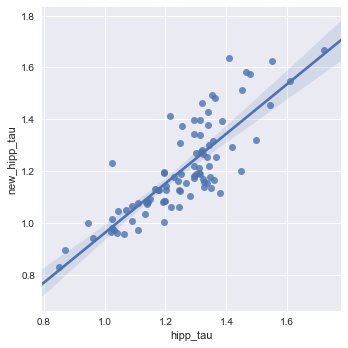

In [21]:
plt.close()
sns.lmplot('hipp_tau','new_hipp_tau',data=hippdf.astype(float))
plt.show()

In [22]:
ncols = cs.columns
ncols = ['idx','subids'] + ncols[2:].tolist()
cs.columns = ncols

In [23]:
cs['old_hipp_tau'] = hippdf['hipp_tau'].astype(float).values
cs['new_hipp_tau'] = hippdf['new_hipp_tau'].astype(float).values

In [57]:
jdf.columns[:14]

Index(['CDRSB', 'ADAS11', 'ADAS13', 'FAQ', 'MOCA', 'EcogPtTotal',
       'EcogSPTotal', 'MMSE', 'ADNI_MEM', 'ADNI_EF', 'DX_final', 'AGE',
       'PTGENDER', 'PTEDUCAT'],
      dtype='object')

In [73]:
jdf['AV1451_Whole_Hippocampus'] = hippdf['hipp_tau'].astype(float).values
jdf['new_hipp_tau'] = hippdf['new_hipp_tau'].astype(float).values
jdf['bad_hipp_tau'] = hippdf['bad_hipp_tau'].astype(float).values
jdf['AV1451_Early_Tau_Cluster'] = hippdf['new_hipp_tau_cons'].astype(float).values
jdf['AV1451_OffTarget_Cluster'] = hippdf['bad_hipp_tau_cons'].astype(float).values

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

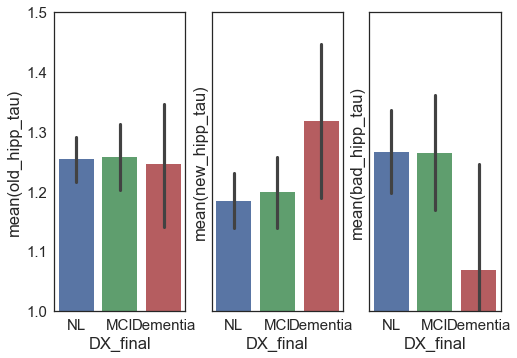

In [59]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('DX_final','old_hipp_tau',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax1)
sns.barplot('DX_final','new_hipp_tau',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax2)
sns.barplot('DX_final','bad_hipp_tau',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax3)
plt.ylim(1.0, 1.5)
plt.show()

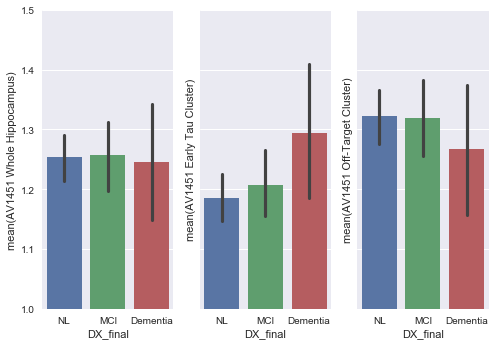

In [26]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('DX_final','AV1451 Whole Hippocampus',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax1)
sns.barplot('DX_final','AV1451 Early Tau Cluster',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax2)
sns.barplot('DX_final','AV1451 Off-Target Cluster',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax3)
plt.ylim(1.0, 1.5)
plt.show()

In [28]:
stats.f_oneway(jdf[jdf.DX_final=='NL']['AV1451 Early Tau Cluster'],
              jdf[jdf.DX_final=='MCI']['AV1451 Early Tau Cluster'],
              jdf[jdf.DX_final=='Dementia']['AV1451 Early Tau Cluster'])

F_onewayResult(statistic=1.8465442694850451, pvalue=0.16391176914509267)

In [43]:
mod = smf.mnlogit('DX_final ~ AGE + PTGENDER + PTEDUCAT + AV1451_Early_Tau_Cluster',
                 data=jdf).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.884668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:                        MNLogit   Df Residuals:                       80
Method:                           MLE   Df Model:                            8
Date:                Thu, 14 Dec 2017   Pseudo R-squ.:                 0.08083
Time:                        01:11:57   Log-Likelihood:                -79.620
converged:                       True   LL-Null:                       -86.621
                                        LLR p-value:                   0.08169
============================================================================================
         y=DX_final[MCI]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.0547      6.167      0.658      0.511      -8.032      16.141
PTGENDER[T.Male]            -0.1923      0.812     -0.237      0.813      -1.783       1.399
AGE                         -0.0434      0.066     -0.657      0.511      -0.173       0.086
PTEDUCAT                     0.2722      0.147      1.855      0.064      -0.015       0.560
AV1451_Early_Tau_Cluster    -3.0635      2.237     -1.369      0.171      -7.448       1.321
--------------------------------------------------------------------------------------------
          y=DX_final[NL]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.6895      6.222      1.718      0.086      -1.506      22.885
PTGENDER[T.Male]            -1.0468      0.806     -1.299      0.194      -2.626       0.532
AGE                         -0.0852      0.067     -1.279      0.201      -0.216       0.045
PTEDUCAT                     0.1882      0.146      1.292      0.197      -0.097       0.474
AV1451_Early_Tau_Cluster    -4.4291      2.279     -1.944      0.052      -8.896       0.037
============================================================================================
"""

In [45]:
mod = smf.ols('AV1451_Early_Tau_Cluster ~ AGE + PTGENDER + PTEDUCAT + DX_final',
                 data=jdf).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     AV1451_Early_Tau_Cluster   R-squared:                       0.083
Model:                                  OLS   Adj. R-squared:                  0.028
Method:                       Least Squares   F-statistic:                     1.521
Date:                      Thu, 14 Dec 2017   Prob (F-statistic):              0.192
Time:                              01:12:47   Log-Likelihood:                 40.911
No. Observations:                        90   AIC:                            -69.82
Df Residuals:                            84   BIC:                            -54.82
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1939      0.236      5.051      0.000       0.724       1.664
PTGENDER[T.Male]    -0.0682      0.035     -1.936      0.056      -0.138       0.002
DX_final[T.MCI]     -0.0858      0.058     -1.479      0.143      -0.201       0.030
DX_final[T.NL]      -0.1174      0.057     -2.054      0.043      -0.231      -0.004
AGE                  0.0012      0.003      0.429      0.669      -0.004       0.007
PTEDUCAT             0.0035      0.007      0.528      0.599      -0.010       0.017
==============================================================================
Omnibus:                        4.165   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                3.743
Skew:                           0.497   Prob(JB):                        0.154
Kurtosis:                       3.093   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
mod = smf.ols('AV1451_Early_Tau_Cluster ~ AGE + PTGENDER + PTEDUCAT',data=jdf).fit()
jdf['AV1451 Early NFT'] = mod.resid
mod = smf.ols('AV1451_OffTarget_Cluster ~ AGE + PTGENDER + PTEDUCAT',data=jdf).fit()
jdf['AV1451 Off-Target'] = mod.resid
mod = smf.ols('AV1451_Whole_Hippocampus ~ AGE + PTGENDER + PTEDUCAT',data=jdf).fit()
jdf['AV1451 Whole Hippocampus'] = mod.resid

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [222]:
jdf.loc[:,'DX_final'] = ['AD' if x=='Dementia' else x for x in jdf.DX_final]

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


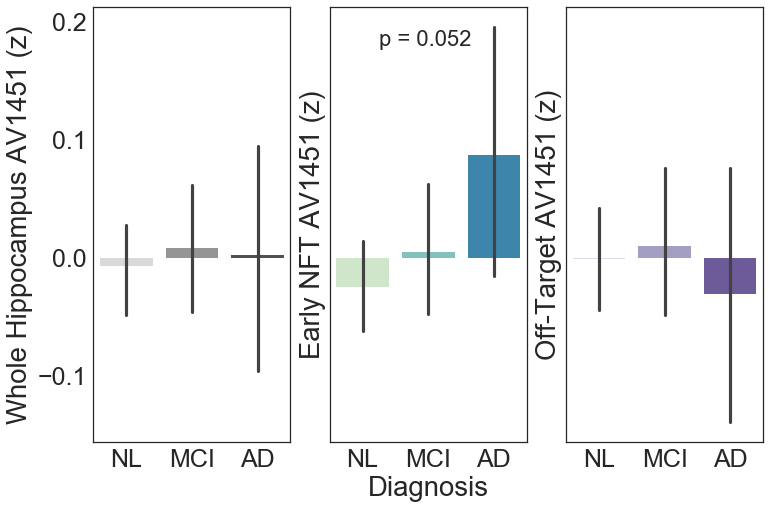

In [247]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.barplot('DX_final','AV1451 Whole Hippocampus',data=jdf, 
            order = ['NL', 'MCI', 'AD'], ax=ax1, palette='Greys')
sns.barplot('DX_final','AV1451 Early NFT',data=jdf, 
            order = ['NL', 'MCI', 'AD'], ax=ax2, palette='GnBu')
sns.barplot('DX_final','AV1451 Off-Target',data=jdf, 
            order = ['NL', 'MCI', 'AD'], ax=ax3, palette='Purples')
ax1.set_ylabel('Whole Hippocampus AV1451 (z)')
ax2.set_ylabel('Early NFT AV1451 (z)')
ax3.set_ylabel('Off-Target AV1451 (z)')
ax1.set_xlabel('')
ax2.set_xlabel('Diagnosis')
ax3.set_xlabel('')
plt.yticks([-0.1, 0, 0.1, 0.2])
ax2.text(0.25, 0.18,'p = 0.052', fontsize=22)
#plt.ylim(1.0, 1.5)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/DX.eps')
plt.show()

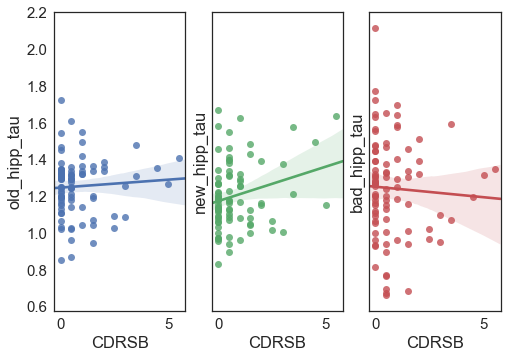

In [61]:

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('CDRSB','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('CDRSB','new_hipp_tau',data=jdf, ax=ax2)
sns.regplot('CDRSB','bad_hipp_tau',data=jdf, ax=ax3)
plt.show()

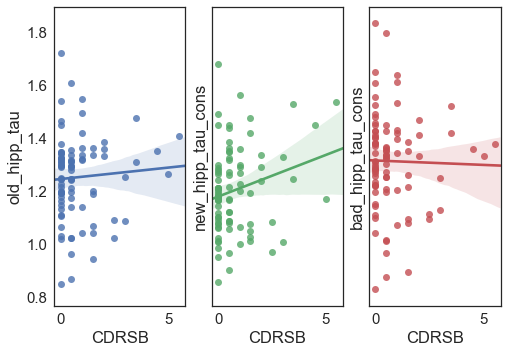

In [62]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('CDRSB','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('CDRSB','new_hipp_tau_cons',data=jdf, ax=ax2)
sns.regplot('CDRSB','bad_hipp_tau_cons',data=jdf, ax=ax3)
plt.show()

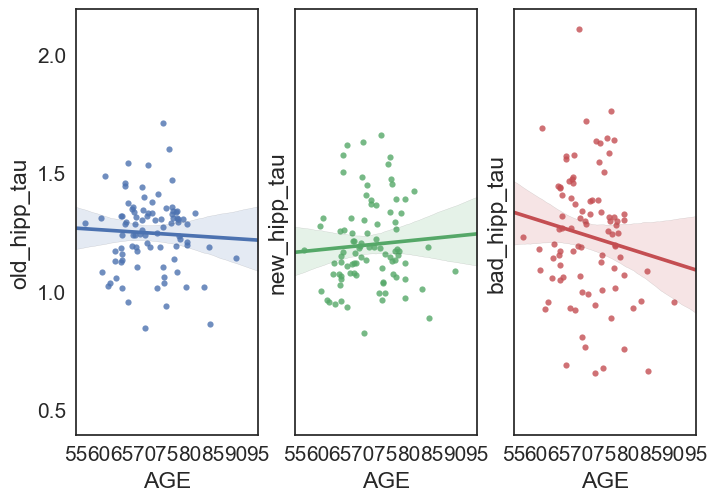

In [223]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('AGE','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('AGE','new_hipp_tau',data=jdf, ax=ax2)
sns.regplot('AGE','bad_hipp_tau',data=jdf, ax=ax3)
plt.show()

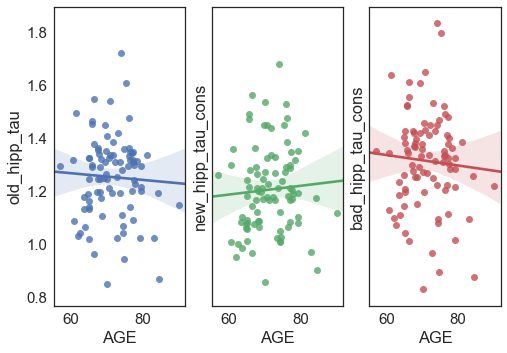

In [63]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('AGE','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('AGE','new_hipp_tau_cons',data=jdf, ax=ax2)
sns.regplot('AGE','bad_hipp_tau_cons',data=jdf, ax=ax3)
plt.show()

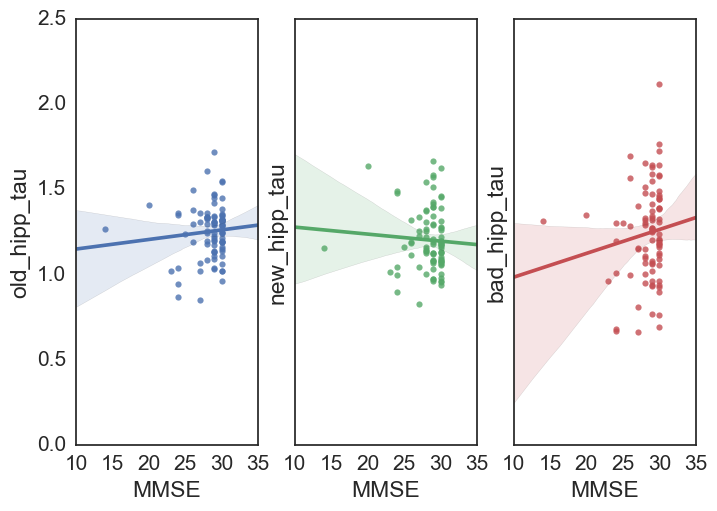

In [225]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('MMSE','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('MMSE','new_hipp_tau',data=jdf, ax=ax2)
sns.regplot('MMSE','bad_hipp_tau',data=jdf, ax=ax3)
plt.show()

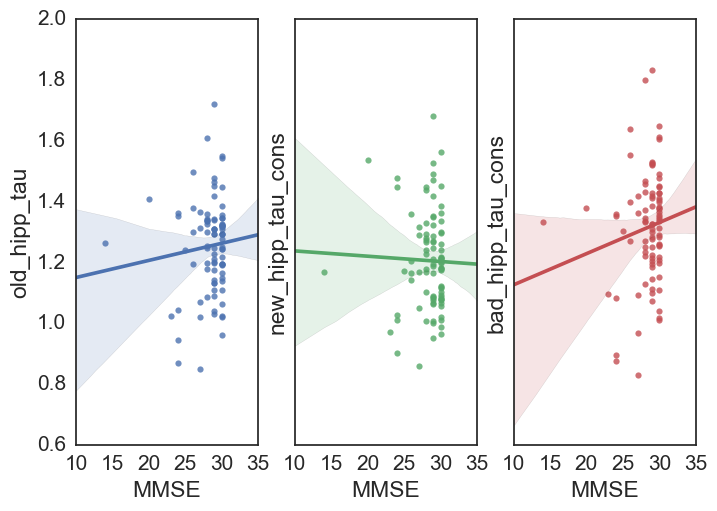

In [226]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('MMSE','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('MMSE','new_hipp_tau_cons',data=jdf, ax=ax2)
sns.regplot('MMSE','bad_hipp_tau_cons',data=jdf, ax=ax3)
plt.show()

In [52]:
for i, row in jdf.iterrows():
    av45 = cs.ix[i,'av45_status_wcb']
    if pandas.notnull(av45):
        if av45 == 0:
            jdf.ix[i,'DX_amyloid'] = '%s-'%row['DX_final']
        else:
            jdf.ix[i,'DX_amyloid'] = '%s+'%row['DX_final']
    else:
        jdf.ix[i,'DX_amyloid'] = np.nan
        

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [190]:
jdf['av45'] = cs.av45_status_wcb
jdf['av45'] = ['Aβ+' if x == 1 else 'Aβ-' for x in jdf['av45']]

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


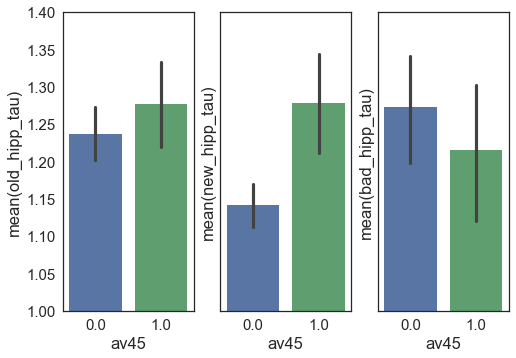

In [66]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('av45','old_hipp_tau',data=jdf, ax=ax1)
sns.barplot('av45','new_hipp_tau',data=jdf, ax=ax2)
sns.barplot('av45','bad_hipp_tau',data=jdf, ax=ax3)
plt.ylim(1.0, 1.4)
plt.show()

In [240]:
12/90

0.13333333333333333

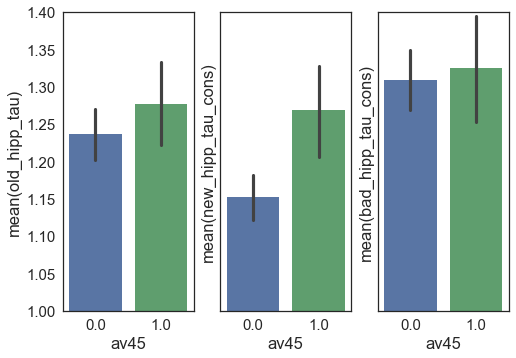

In [67]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('av45','old_hipp_tau',data=jdf, ax=ax1)
sns.barplot('av45','new_hipp_tau_cons',data=jdf, ax=ax2)
sns.barplot('av45','bad_hipp_tau_cons',data=jdf, ax=ax3)
plt.ylim(1.0, 1.4)
plt.show()

In [55]:
stats.ttest_ind(jdf[jdf['av45'] == 0]['AV1451 Early Tau Cluster'],
               jdf[jdf['av45'] == 1]['AV1451 Early Tau Cluster'])

Ttest_indResult(statistic=-3.5404349043851462, pvalue=0.00065087459260356937)

In [56]:
mod = smf.mnlogit('av45 ~ AGE + PTGENDER + PTEDUCAT + AV1451_Early_Tau_Cluster',
                 data=jdf).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.512176
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                   av45   No. Observations:                   87
Model:                        MNLogit   Df Residuals:                       82
Method:                           MLE   Df Model:                            4
Date:                Thu, 14 Dec 2017   Pseudo R-squ.:                  0.2553
Time:                        01:17:04   Log-Likelihood:                -44.559
converged:                       True   LL-Null:                       -59.837
                                        LLR p-value:                 3.770e-06
============================================================================================
                  av45=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -19.3256      5.092     -3.796      0.000     -29.305      -9.346
PTGENDER[T.Male]             1.0715      0.588      1.823      0.068      -0.080       2.223
AGE                          0.1738      0.051      3.387      0.001       0.073       0.274
PTEDUCAT                    -0.1346      0.103     -1.304      0.192      -0.337       0.068
AV1451_Early_Tau_Cluster     6.8474      2.019      3.391      0.001       2.890      10.805
============================================================================================
"""

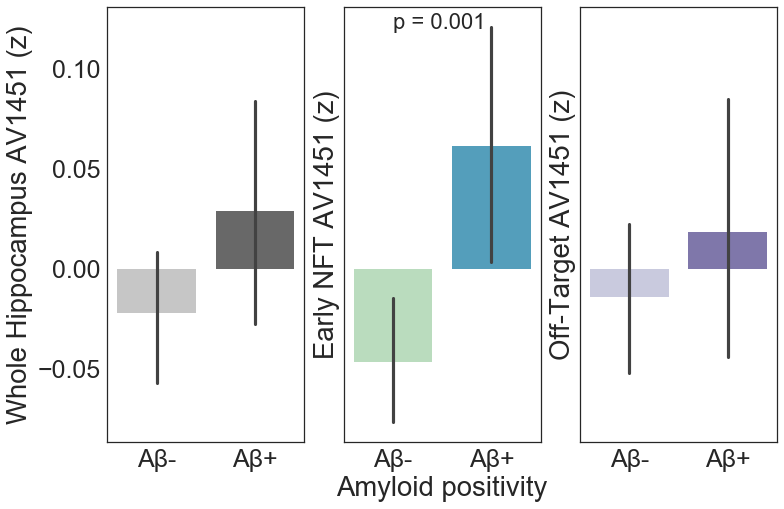

In [246]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.barplot('av45','AV1451 Whole Hippocampus',data=jdf, ax=ax1, palette='Greys')
sns.barplot('av45','AV1451 Early NFT',data=jdf, ax=ax2, palette='GnBu')
sns.barplot('av45','AV1451 Off-Target',data=jdf, ax=ax3, palette='Purples')
ax1.set_ylabel('Whole Hippocampus AV1451 (z)')
ax2.set_ylabel('Early NFT AV1451 (z)')
ax3.set_ylabel('Off-Target AV1451 (z)')
ax1.set_xlabel('')
ax2.set_xlabel('Amyloid positivity')
ax3.set_xlabel('')
ax2.text(0.0, 0.12,'p = 0.001', fontsize=22)
#plt.ylim(1.0, 1.5)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/amyloid.eps')
plt.show()

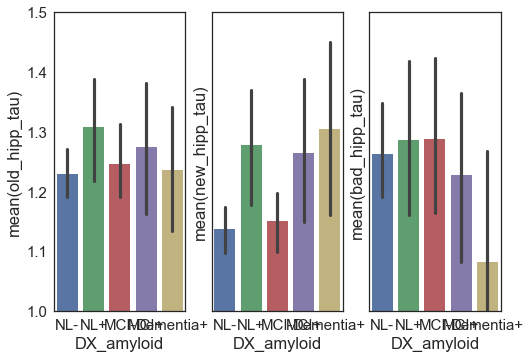

In [68]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('DX_amyloid','old_hipp_tau',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax1)
sns.barplot('DX_amyloid','new_hipp_tau',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax2)
sns.barplot('DX_amyloid','bad_hipp_tau',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax3)
plt.ylim(1.0, 1.5)
plt.show()

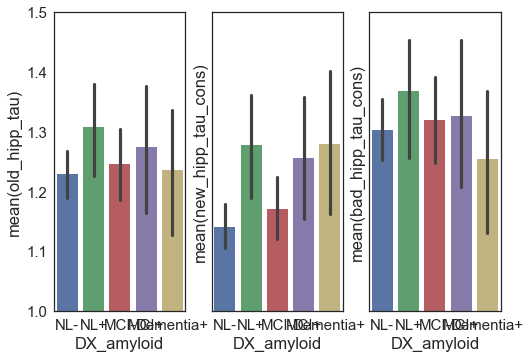

In [69]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('DX_amyloid','old_hipp_tau',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax1)
sns.barplot('DX_amyloid','new_hipp_tau_cons',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax2)
sns.barplot('DX_amyloid','bad_hipp_tau_cons',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax3)
plt.ylim(1.0, 1.5)
plt.show()

In [61]:
stats.f_oneway(jdf[jdf.DX_amyloid == 'NL-']['AV1451 Early Tau Cluster'],
               jdf[jdf.DX_amyloid == 'NL+']['AV1451 Early Tau Cluster'],
                jdf[jdf.DX_amyloid == 'MCI-']['AV1451 Early Tau Cluster'],
                jdf[jdf.DX_amyloid == 'MCI+']['AV1451 Early Tau Cluster'],
                jdf[jdf.DX_amyloid == 'Dementia+']['AV1451 Early Tau Cluster']
               )

F_onewayResult(statistic=3.2128914829913717, pvalue=0.016754271116635355)

In [62]:
mod = smf.mnlogit('DX_amyloid ~ AGE + PTGENDER + PTEDUCAT + AV1451_Early_Tau_Cluster',
                 data=jdf).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 1.302814
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                   87
Model:                        MNLogit   Df Residuals:                       67
Method:                           MLE   Df Model:                           16
Date:                Thu, 14 Dec 2017   Pseudo R-squ.:                  0.1556
Time:                        01:22:25   Log-Likelihood:                -113.34
converged:                       True   LL-Null:                       -134.23
                                        LLR p-value:                 0.0004257
============================================================================================
      y=DX_amyloid[MCI+]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -7.0456      7.932     -0.888      0.374     -22.592       8.500
PTGENDER[T.Male]             0.1915      0.963      0.199      0.842      -1.696       2.079
AGE                          0.0793      0.086      0.921      0.357      -0.089       0.248
PTEDUCAT                     0.1082      0.161      0.672      0.501      -0.207       0.423
AV1451_Early_Tau_Cluster    -0.0502      2.533     -0.020      0.984      -5.015       4.914
--------------------------------------------------------------------------------------------
      y=DX_amyloid[MCI-]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   12.9581      8.049      1.610      0.107      -2.818      28.735
PTGENDER[T.Male]            -1.3082      0.976     -1.340      0.180      -3.221       0.605
AGE                         -0.1342      0.085     -1.574      0.115      -0.301       0.033
PTEDUCAT                     0.3717      0.175      2.126      0.033       0.029       0.714
AV1451_Early_Tau_Cluster    -6.4369      3.015     -2.135      0.033     -12.346      -0.528
--------------------------------------------------------------------------------------------
       y=DX_amyloid[NL+]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0908      8.270      0.011      0.991     -16.118      16.299
PTGENDER[T.Male]            -1.3589      0.971     -1.400      0.161      -3.261       0.543
AGE                         -0.0132      0.089     -0.149      0.882      -0.188       0.161
PTEDUCAT                     0.2124      0.173      1.228      0.219      -0.126       0.551
AV1451_Early_Tau_Cluster    -1.0291      2.856     -0.360      0.719      -6.626       4.568
--------------------------------------------------------------------------------------------
       y=DX_amyloid[NL-]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   20.8038      8.070      2.578      0.010       4.986      36.621
PTGENDER[T.Male]            -1.8002      0.948     -1.900      0.057      -3.657       0.057
AGE                         -0.1621      0.085     -1.911      0.056      -0.328       0.004
PTEDUCAT                     0.1745      0.164      1.063      0.288      -0.147       0.496
AV1451_Early_Tau_Cluster    -8.2012      2.960     -2.771      0.006     -14.003      -2.399
============================================================================================
"""

In [63]:
mod = smf.ols('AV1451_Early_Tau_Cluster ~ AGE + PTGENDER + PTEDUCAT + DX_amyloid',
                 data=jdf).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     AV1451_Early_Tau_Cluster   R-squared:                       0.189
Model:                                  OLS   Adj. R-squared:                  0.117
Method:                       Least Squares   F-statistic:                     2.623
Date:                      Thu, 14 Dec 2017   Prob (F-statistic):             0.0173
Time:                              01:23:25   Log-Likelihood:                 44.281
No. Observations:                        87   AIC:                            -72.56
Df Residuals:                            79   BIC:                            -52.83
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.4626      0.246      5.936      0.000       0.972       1.953
PTGENDER[T.Male]      -0.0710      0.035     -2.047      0.044      -0.140      -0.002
DX_amyloid[T.MCI+]    -0.0162      0.064     -0.251      0.803      -0.144       0.112
DX_amyloid[T.MCI-]    -0.1326      0.063     -2.088      0.040      -0.259      -0.006
DX_amyloid[T.NL+]     -0.0229      0.066     -0.345      0.731      -0.155       0.109
DX_amyloid[T.NL-]     -0.1677      0.060     -2.784      0.007      -0.288      -0.048
AGE                   -0.0029      0.003     -0.944      0.348      -0.009       0.003
PTEDUCAT               0.0047      0.007      0.724      0.471      -0.008       0.018
==============================================================================
Omnibus:                        0.918   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.563
Skew:                           0.187   Prob(JB):                        0.755
Kurtosis:                       3.124   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

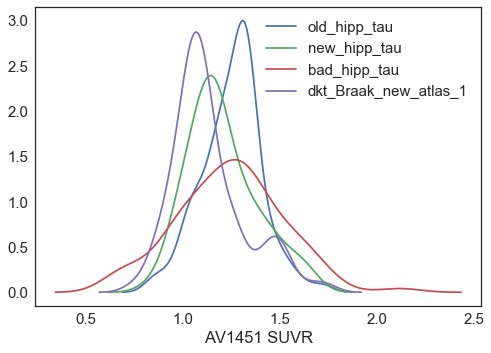

In [70]:
plt.close()
sns.kdeplot(jdf.old_hipp_tau)
sns.kdeplot(jdf.new_hipp_tau)
sns.kdeplot(jdf.bad_hipp_tau)
sns.kdeplot(jdf.dkt_Braak_new_atlas_1)
plt.xlabel('AV1451 SUVR')
plt.legend = True
plt.show()

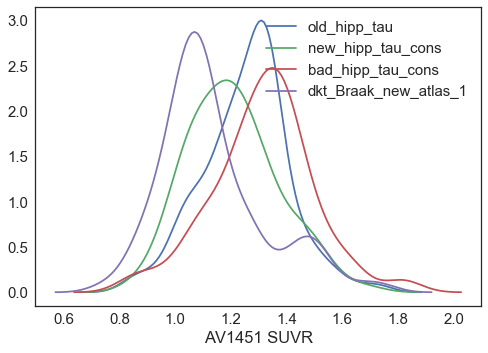

In [73]:
plt.close()
sns.kdeplot(jdf.old_hipp_tau)
sns.kdeplot(jdf.new_hipp_tau_cons)
sns.kdeplot(jdf.bad_hipp_tau_cons)
sns.kdeplot(jdf.dkt_Braak_new_atlas_1)
plt.xlabel('AV1451 SUVR')
plt.legend = True
plt.show()

In [74]:
for col in jdf.columns[:14]:
    if col != 'DX_final':
        print(col,'old:     ',
             smf.ols('%s ~ old_hipp_tau'%col, data=jdf).fit().pvalues[-1])
        print(col,'new:     ',
             smf.ols('%s ~ new_hipp_tau'%col, data=jdf).fit().pvalues[-1])
        print('\n')

CDRSB old:      0.546464323723
CDRSB new:      0.0216000031674


ADAS11 old:      0.931014830448
ADAS11 new:      0.0661573732626


ADAS13 old:      0.584876157694
ADAS13 new:      0.238540466147


FAQ old:      0.965523317193
FAQ new:      0.0967212299982


MOCA old:      0.327926972321
MOCA new:      0.297903413728


EcogPtTotal old:      0.834996446276
EcogPtTotal new:      0.563553983438


EcogSPTotal old:      0.850058816302
EcogSPTotal new:      0.0273457220926


MMSE old:      0.398326923639
MMSE new:      0.597133037196


ADNI_MEM old:      0.655391990062
ADNI_MEM new:      0.0605192395018


ADNI_EF old:      0.128918314881
ADNI_EF new:      0.648219501997


AGE old:      0.638044644025
AGE new:      0.534019406719


PTGENDER old:      0.0322952837125
PTGENDER new:      0.117016477187


PTEDUCAT old:      0.702051545203
PTEDUCAT new:      0.845490800883




In [68]:
for col in jdf.columns[:14]:
    if col != 'DX_final':
        print(col,'Early Tau:     ',
             smf.ols('%s ~ AGE + PTGENDER + PTEDUCAT + AV1451_Early_Tau_Cluster'%col, 
                     data=jdf).fit().pvalues[-1])
        print(col,'Noise:         ',
             smf.ols('%s ~ AGE + PTGENDER + PTEDUCAT + AV1451_OffTarget_Cluster'%col, 
                     data=jdf).fit().pvalues[-1])
        print('\n')

CDRSB Early Tau:      0.0216013206932
CDRSB Noise:          0.904251743496


ADAS11 Early Tau:      0.111204271441
ADAS11 Noise:          0.754309373364


ADAS13 Early Tau:      0.35240114503
ADAS13 Noise:          0.444280750863


FAQ Early Tau:      0.185040303374
FAQ Noise:          0.680218378547


MOCA Early Tau:      0.216661140823
MOCA Noise:          0.428865880688


EcogPtTotal Early Tau:      0.403595556829
EcogPtTotal Noise:          0.778898954522


EcogSPTotal Early Tau:      0.0273058740447
EcogSPTotal Noise:          0.941518392305


MMSE Early Tau:      0.827240330172
MMSE Noise:          0.297617737922


ADNI_MEM Early Tau:      0.0274081618223
ADNI_MEM Noise:          0.795346039934


ADNI_EF Early Tau:      0.535943273888
ADNI_EF Noise:          0.105793388185


AGE Early Tau:      0.939494080755
AGE Noise:          0.875498910904




ValueError: shapes (90,2) and (90,2) not aligned: 2 (dim 1) != 90 (dim 0)

In [69]:
smf.ols('ADNI_MEM ~ AGE + PTGENDER + PTEDUCAT + AV1451_Early_Tau_Cluster', 
                     data=jdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ADNI_MEM   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     7.813
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           2.06e-05
Time:                        01:52:23   Log-Likelihood:                -107.96
No. Observations:                  90   AIC:                             225.9
Df Residuals:                      85   BIC:                             238.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.6400      1.322      2.754      0.007       1.012       6.268
PTGENDER[T.Male]            -0.5409      0.183     -2.950      0.004      -0.905      -0.176
AGE                         -0.0415      0.014     -2.891      0.005      -0.070      -0.013
PTEDUCAT                     0.1137      0.034      3.343      0.001       0.046       0.181
AV1451_Early_Tau_Cluster    -1.2415      0.553     -2.244      0.027      -2.341      -0.142
==============================================================================
Omnibus:                        3.577   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                2.960
Skew:                          -0.332   Prob(JB):                        0.228
Kurtosis:                       2.410   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

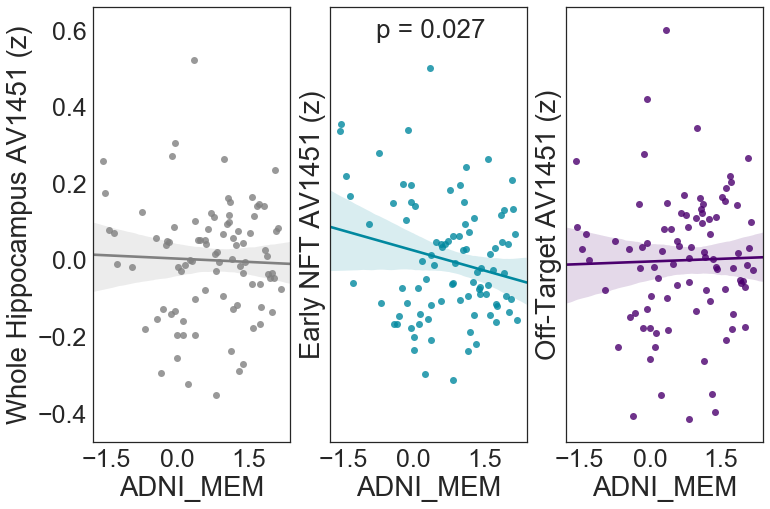

In [245]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.regplot('ADNI_MEM','AV1451 Whole Hippocampus',data=jdf, ax=ax1, color='gray')
sns.regplot('ADNI_MEM','AV1451 Early NFT',data=jdf, ax=ax2, color=sns.xkcd_rgb["teal blue"])
sns.regplot('ADNI_MEM','AV1451 Off-Target',data=jdf, ax=ax3, color=sns.xkcd_rgb["royal purple"])
for ax in [ax1,ax2,ax3]:
    ax.set_xticks([-1.5, 0, 1.5])
ax1.set_ylabel('Whole Hippocampus AV1451 (z)')
ax2.set_ylabel('Early NFT AV1451 (z)')
ax3.set_ylabel('Off-Target AV1451 (z)')
ax2.text(-0.8, 0.58,'p = 0.027', fontsize=26)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/memory.eps')
plt.show()

In [95]:
sns.regplot?

//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


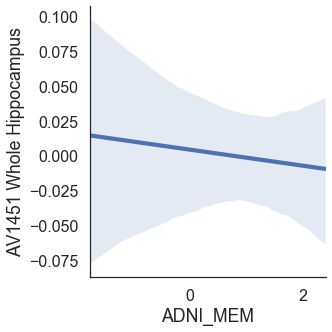

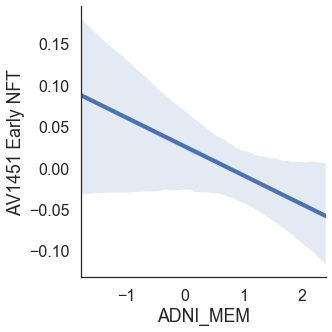

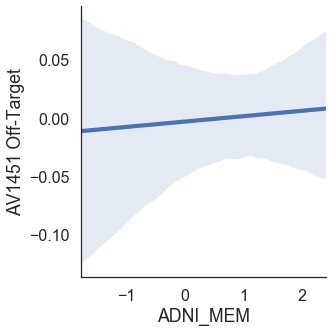

In [128]:
plt.close()
sns.lmplot('ADNI_MEM','AV1451 Whole Hippocampus', data = jdf, markers = "None")
sns.lmplot('ADNI_MEM','AV1451 Early NFT', markers='None', data = jdf)
sns.lmplot('ADNI_MEM','AV1451 Off-Target', markers='None', data = jdf)
plt.legend()
plt.show()

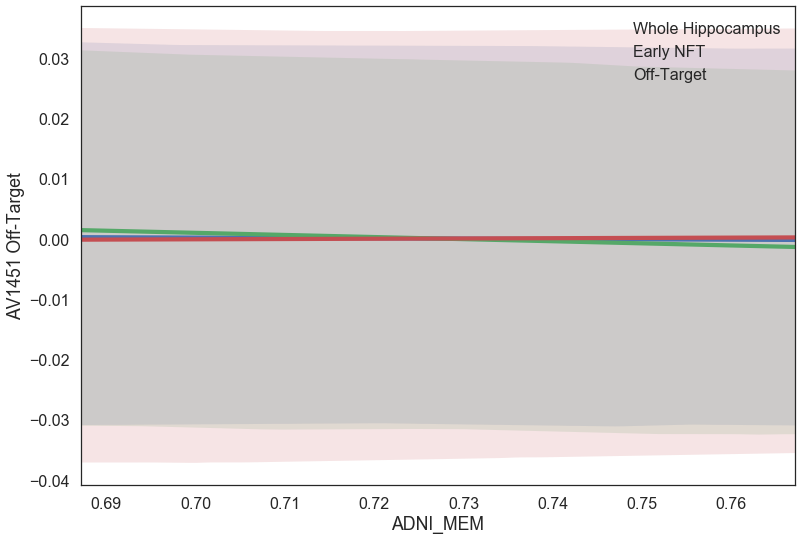

In [129]:
plt.close()
sns.regplot(jdf['ADNI_MEM'],jdf['AV1451 Whole Hippocampus'], marker = 'None', label='Whole Hippocampus')
sns.regplot(jdf['ADNI_MEM'],jdf['AV1451 Early NFT'], marker='None', label = 'Early NFT')
sns.regplot(jdf['ADNI_MEM'],jdf['AV1451 Off-Target'], marker='None', label = 'Off-Target')
plt.legend()
plt.show()

In [83]:
braak1 = jdf[jdf.columns[14:20]]
braak2 = jdf[['dkt_Braak_new_atlas_1','new_hipp_tau_cons'] + jdf.columns[16:20].tolist()]

In [88]:
braak1['total_tau'] = braak1.sum(axis=1)
braak2['total_tau'] = braak2.sum(axis=1)

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [110]:
sns.heatmap?

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


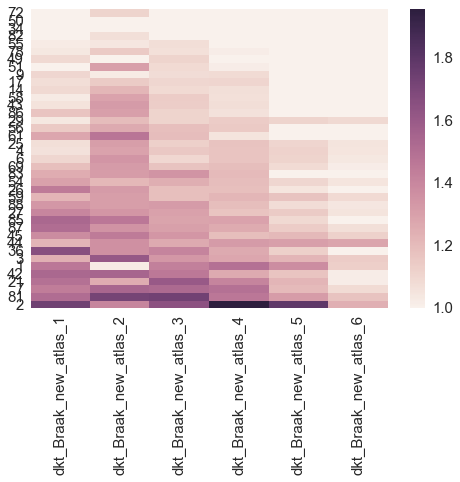

In [111]:
plt.close()
sns.heatmap(braak1.sort_values('total_tau')[jdf.av45==1][braak1.columns[:-1]],
           vmin=1)
plt.show()

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


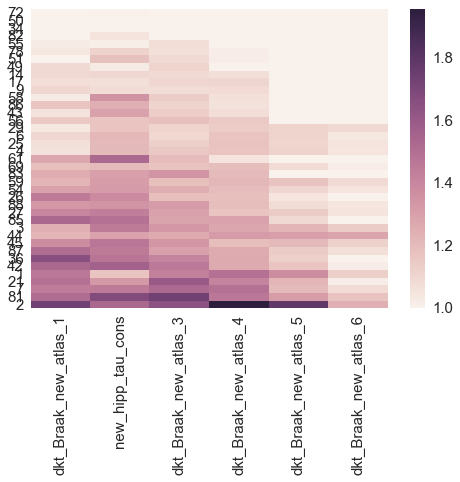

In [112]:
plt.close()
sns.heatmap(braak2.sort_values('total_tau')[jdf.av45==1][braak2.columns[:-1]],vmin=1)
plt.show()

In [107]:
b1bin = pandas.DataFrame(braak1,copy=True)
b2bin = pandas.DataFrame(braak2,copy=True)
for sub in b1bin.index:
    for col in b1bin.columns:
        if b1bin.ix[sub,col] < 1.4:
            b1bin.ix[sub,col] = 0
for sub in b2bin.index:
    for col in b2bin.columns:
        if b2bin.ix[sub,col] < 1.4:
            b2bin.ix[sub,col] = 0

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


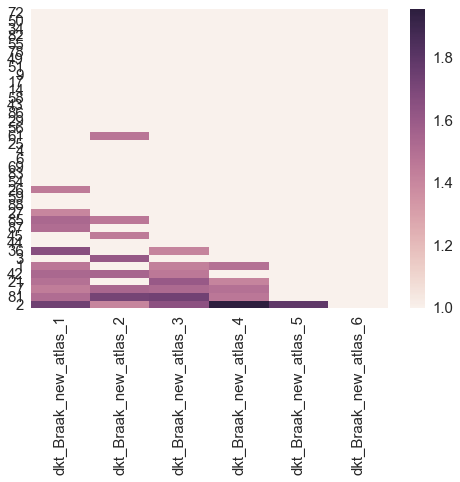

In [127]:
plt.close()
sns.heatmap(b1bin.sort_values('total_tau')[jdf.av45==1][b1bin.columns[:-1]], vmin=1)
plt.show()

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


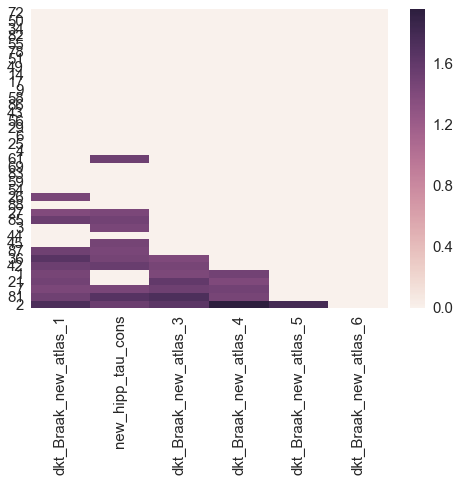

In [109]:
plt.close()
sns.heatmap(b2bin.sort_values('total_tau')[jdf.av45==1][b2bin.columns[:-1]])
plt.show()

In [117]:
zb1 = (braak1 - braak1.mean()) / braak1.std()
zb2 = (braak2 - braak2.mean()) / braak2.std()

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


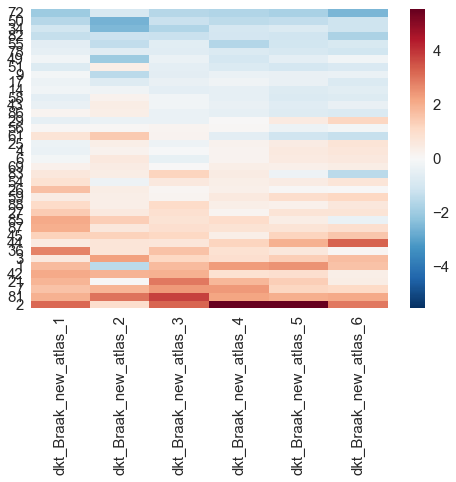

In [124]:
plt.close()
sns.heatmap(zb1.sort_values('total_tau')[jdf.av45==1][zb1.columns[:-1]])
plt.show()

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


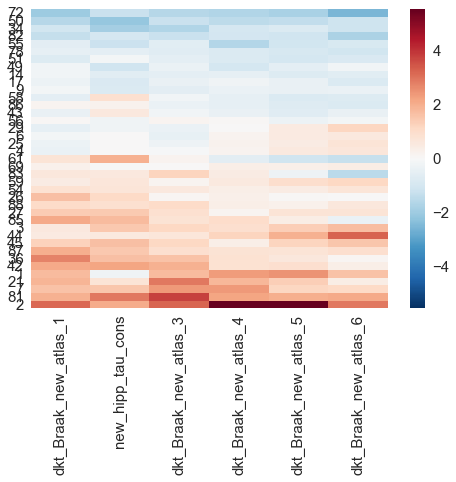

In [125]:
plt.close()
sns.heatmap(zb2.sort_values('total_tau')[jdf.av45==1][zb2.columns[:-1]])
plt.show()

## NOW ADDING MORE SUBBIES

In [30]:
bt = pandas.read_csv('/Users/jakevogel/Science/tau/big_tau.csv')
bt = bt.loc[bt.visit == 1]
bt.shape

(258, 41)

In [31]:
bt.index = bt.ID

In [37]:
bt.head()

,ID,visit,scandate,1_OffTarget,2_Frontal,3_Temporal,4_Temporoparietal,5_Sensory,Hipp_OffTarget,Hipp_EarlyTau,...,ICV,DX_fill,av45_status,reference_date,time_difference_days,whole_hippocampus_AV1451,av45_date,av45_time_difference_days,ADNI_MEM,ADNI_EF
ID,,,,,,,,,,,,,,,,,,,,,
002_S_0413,002_S_0413,1.0,2017-06-21,0.556860,0.755623,0.840567,0.849258,0.784010,0.993596,0.765412,...,1602970.0,NL,0.0,2017-06-15,6.0,0.901752,2017-06-15,6.0,1.085,1.982
002_S_1155,002_S_1155,1.0,2017-04-24,0.894891,1.092542,1.174600,1.123418,1.053782,1.112060,1.049716,...,NaN,MCI,0.0,2017-04-20,4.0,1.086967,2017-04-20,4.0,0.396,1.444
002_S_1261,002_S_1261,1.0,2017-03-15,0.799323,1.041872,1.210508,1.140991,1.088301,1.414064,1.268073,...,1490670.0,MCI,1.0,2017-03-14,1.0,1.355302,2017-03-14,1.0,0.001,-0.116
002_S_1280,002_S_1280,1.0,2017-03-13,0.900107,1.001559,1.195115,1.245342,1.135461,1.310057,1.231244,...,NaN,NL,1.0,2017-03-02,11.0,1.278335,2017-03-02,11.0,-0.277,0.868
002_S_4213,002_S_4213,1.0,2017-08-17,0.510890,0.772613,0.884422,0.885704,0.835541,0.908119,0.802743,...,NaN,NL,0.0,2017-08-10,7.0,0.865705,2015-09-30,687.0,0.918,1.065


In [38]:
bt.columns

Index(['ID', 'visit', 'scandate', '1_OffTarget', '2_Frontal', '3_Temporal',
       '4_Temporoparietal', '5_Sensory', 'Hipp_OffTarget', 'Hipp_EarlyTau',
       'AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 'AV45', 'CDRSB', 'ADAS11',
       'ADAS13', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning',
       'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'FAQ', 'MOCA',
       'EcogSPTotal', 'EcogPtTotal', 'ICV', 'DX_fill', 'av45_status',
       'reference_date', 'time_difference_days', 'whole_hippocampus_AV1451',
       'av45_date', 'av45_time_difference_days', 'ADNI_MEM', 'ADNI_EF'],
      dtype='object')

In [41]:
ncols = bt.columns[:8].tolist() + ['AV1451 Off-Target','AV1451 Early NFT'
                           ] + bt.columns[10:-5].tolist() + ['AV1451 Whole Hippocampus'
                                                            ] + bt.columns[-4:].tolist()

In [42]:
len(ncols) == len(bt.columns)

True

In [43]:
list(zip(ncols,bt.columns))

[('ID', 'ID'),
 ('visit', 'visit'),
 ('scandate', 'scandate'),
 ('1_OffTarget', '1_OffTarget'),
 ('2_Frontal', '2_Frontal'),
 ('3_Temporal', '3_Temporal'),
 ('4_Temporoparietal', '4_Temporoparietal'),
 ('5_Sensory', '5_Sensory'),
 ('AV1451 Off-Target', 'Hipp_OffTarget'),
 ('AV1451 Early NFT', 'Hipp_EarlyTau'),
 ('AGE', 'AGE'),
 ('PTGENDER', 'PTGENDER'),
 ('PTEDUCAT', 'PTEDUCAT'),
 ('APOE4', 'APOE4'),
 ('AV45', 'AV45'),
 ('CDRSB', 'CDRSB'),
 ('ADAS11', 'ADAS11'),
 ('ADAS13', 'ADAS13'),
 ('MMSE', 'MMSE'),
 ('RAVLT_immediate', 'RAVLT_immediate'),
 ('RAVLT_learning', 'RAVLT_learning'),
 ('RAVLT_forgetting', 'RAVLT_forgetting'),
 ('RAVLT_perc_forgetting', 'RAVLT_perc_forgetting'),
 ('FAQ', 'FAQ'),
 ('MOCA', 'MOCA'),
 ('EcogSPTotal', 'EcogSPTotal'),
 ('EcogPtTotal', 'EcogPtTotal'),
 ('ICV', 'ICV'),
 ('DX_fill', 'DX_fill'),
 ('av45_status', 'av45_status'),
 ('reference_date', 'reference_date'),
 ('time_difference_days', 'time_difference_days'),
 ('AV1451 Whole Hippocampus', 'whole_hippocampus

In [44]:
bt.columns = ncols

In [45]:
whF, whp = stats.f_oneway(bt[bt.DX_fill == 'NL']['AV1451 Whole Hippocampus'],
              bt[bt.DX_fill == 'MCI']['AV1451 Whole Hippocampus'],
              bt[bt.DX_fill == 'Dementia']['AV1451 Whole Hippocampus'])
print('whole hippocampus:',whF,whp)

etF, etp = stats.f_oneway(bt[bt.DX_fill == 'NL']['AV1451 Early NFT'],
              bt[bt.DX_fill == 'MCI']['AV1451 Early NFT'],
              bt[bt.DX_fill == 'Dementia']['AV1451 Early NFT'])
print('Early NFT:',etF,etp)

otF, otp = stats.f_oneway(bt[bt.DX_fill == 'NL']['AV1451 Off-Target'],
              bt[bt.DX_fill == 'MCI']['AV1451 Off-Target'],
              bt[bt.DX_fill == 'Dementia']['AV1451 Off-Target'])
print('Off-Target:',otF,otp)

whole hippocampus: 7.16745392839 0.000936614282763
Early NFT: 17.7999723425 5.80354391678e-08
Off-Target: 2.24022793415 0.108525012255


In [46]:
bt.loc[:,'DX'] = ['AD' if x == 'Dementia' else x for x in bt.DX_fill]

In [47]:
print(len(bt[bt.DX=='NL']))
print(len(bt[bt.DX=='MCI']))
print(len(bt[bt.DX=='AD']))

143
88
27


In [15]:
143+88+27

258

In [48]:
bt.shape

(258, 38)

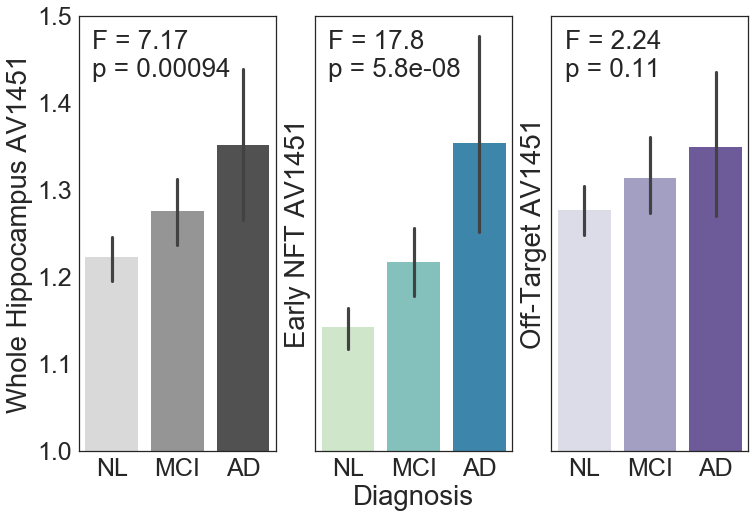

In [50]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.barplot('DX','AV1451 Whole Hippocampus',data=bt, 
            order = ['NL', 'MCI', 'AD'], ax=ax1, palette='Greys')
sns.barplot('DX','AV1451 Early NFT',data=bt, 
            order = ['NL', 'MCI', 'AD'], ax=ax2, palette='GnBu')
sns.barplot('DX','AV1451 Off-Target',data=bt, 
            order = ['NL', 'MCI', 'AD'], ax=ax3, palette='Purples')
ax1.set_ylabel('Whole Hippocampus AV1451')
ax2.set_ylabel('Early NFT AV1451')
ax3.set_ylabel('Off-Target AV1451')
ax1.set_xlabel('')
ax2.set_xlabel('Diagnosis')
ax3.set_xlabel('')
#plt.yticks([-0.1, 0, 0.1, 0.2])
ax1.text(-0.3, 1.43,'F = %s\np = %s'%(float('%.3g' % whF),float('%.2g' % whp)), fontsize=26)
ax2.text(-0.3, 1.43,'F = %s\np = %s'%(float('%.3g' % etF),float('%.2g' % etp)), fontsize=26)
ax3.text(-0.3, 1.43,'F = %s\np = %s'%(float('%.3g' % otF),float('%.2g' % otp)), fontsize=26)
plt.ylim(1.0, 1.5)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/DX_n258.pdf')
plt.show()

In [52]:
wht, whtp = stats.ttest_ind(bt[bt.av45_status == 0]['AV1451 Whole Hippocampus'].dropna(),
              bt[bt.av45_status == 1]['AV1451 Whole Hippocampus'].dropna())
print('whole hippocampus:',wht,whtp)

ett, ettp = stats.ttest_ind(bt[bt.av45_status == 0]['AV1451 Early NFT'].dropna(),
              bt[bt.av45_status == 1]['AV1451 Early NFT'].dropna())
print('Early NFT:',ett, ettp)

ott, ottp = stats.ttest_ind(bt[bt.av45_status == 0]['AV1451 Off-Target'].dropna(),
              bt[bt.av45_status == 1]['AV1451 Off-Target'].dropna())
print('Off-Target:',ott, ottp)

aneg = len(bt[bt.av45_status == 0]['AV1451 Whole Hippocampus'].dropna())
apos = len(bt[bt.av45_status == 1]['AV1451 Whole Hippocampus'].dropna())
print('n av45- = %s, n av45+ = %s, total = %s'%(aneg,apos,(aneg+apos)))

whole hippocampus: -3.88475079345 0.00013553247541
Early NFT: -6.14527422174 3.70289506786e-09
Off-Target: -2.12681440801 0.0345491684323
n av45- = 123, n av45+ = 99, total = 222


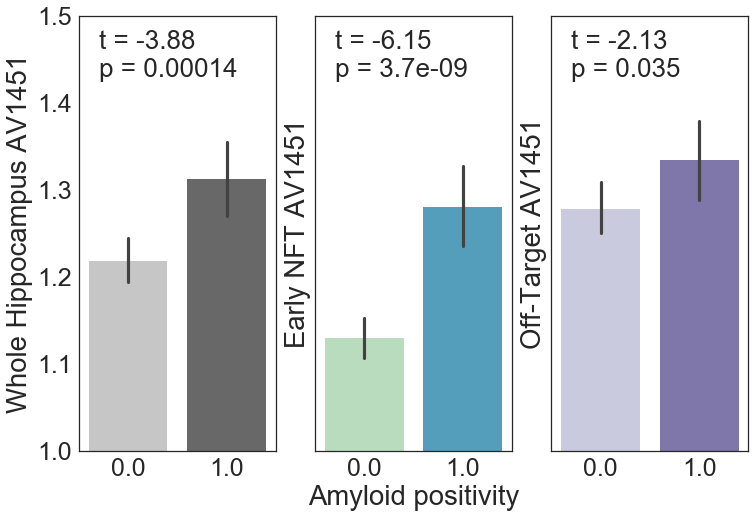

In [53]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.barplot('av45_status','AV1451 Whole Hippocampus',data=bt, ax=ax1, palette='Greys')
sns.barplot('av45_status','AV1451 Early NFT',data=bt, ax=ax2, palette='GnBu')
sns.barplot('av45_status','AV1451 Off-Target',data=bt, ax=ax3, palette='Purples')
ax1.set_ylabel('Whole Hippocampus AV1451')
ax2.set_ylabel('Early NFT AV1451')
ax3.set_ylabel('Off-Target AV1451')
ax1.set_xlabel('')
ax2.set_xlabel('Amyloid positivity')
ax3.set_xlabel('')
ax1.text(-0.3, 1.43,'t = %s\np = %s'%(float('%.3g' % wht),float('%.2g' % whtp)), fontsize=26)
ax2.text(-0.3, 1.43,'t = %s\np = %s'%(float('%.3g' % ett),float('%.2g' % ettp)), fontsize=26)
ax3.text(-0.3, 1.43,'t = %s\np = %s'%(float('%.3g' % ott),float('%.2g' % ottp)), fontsize=26)
plt.ylim(1.0, 1.5)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/amyloid_n222.pdf')
plt.show()

In [54]:
mcols = ['AV1451 Whole Hippocampus','AV1451 Early NFT','AV1451 Off-Target','MMSE']
mmsedf = bt[mcols].dropna()

whmr,whmp = stats.pearsonr(mmsedf['AV1451 Whole Hippocampus'], mmsedf['MMSE'])
print('whole hippocampus:',whmr,whmp)

etmr,etmp = stats.pearsonr(mmsedf['AV1451 Early NFT'], mmsedf['MMSE'])
print('Early NFT:',etmr,etmp)

otmr, otmp = stats.pearsonr(mmsedf['AV1451 Off-Target'], mmsedf['MMSE'])
print('Off-Target:',otmr, otmp)

print('n = ',len(mmsedf))

whole hippocampus: -0.224382122786 0.00097504876123
Early NFT: -0.372483846897 2.0547845971e-08
Off-Target: -0.103660413224 0.131545058615
n =  213


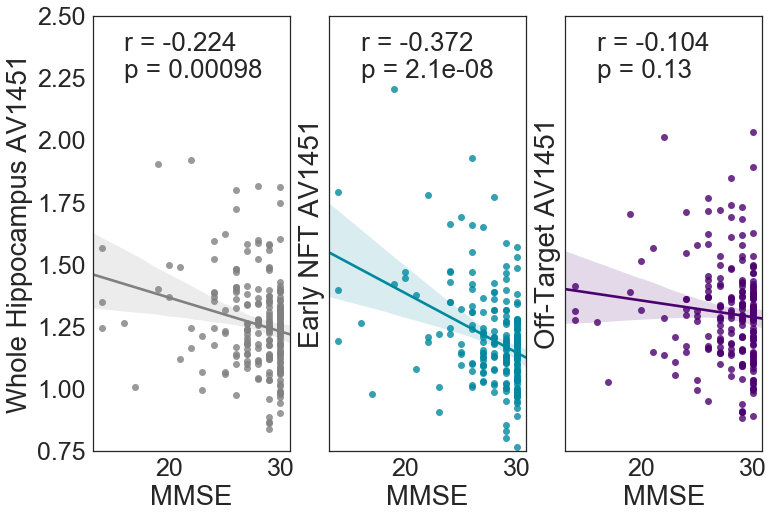

In [57]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.regplot('MMSE','AV1451 Whole Hippocampus',data=mmsedf, ax=ax1, color='gray')
sns.regplot('MMSE','AV1451 Early NFT',data=mmsedf, ax=ax2, color=sns.xkcd_rgb["teal blue"])
sns.regplot('MMSE','AV1451 Off-Target',data=mmsedf, ax=ax3, color=sns.xkcd_rgb["royal purple"])
#for ax in [ax1,ax2,ax3]:
#    ax.set_xticks([-1.5, 0, 1.5])
ax1.set_ylabel('Whole Hippocampus AV1451')
ax2.set_ylabel('Early NFT AV1451')
ax3.set_ylabel('Off-Target AV1451')
plt.ylim(0.75, 2.5)
ax1.text(16, 2.25,'r = %s\np = %s'%(float('%.3g' % whmr),float('%.2g' % whmp)), fontsize=26)
ax2.text(16, 2.25,'r = %s\np = %s'%(float('%.3g' % etmr),float('%.2g' % etmp)), fontsize=26)
ax3.text(16, 2.25,'r = %s\np = %s'%(float('%.3g' % otmr),float('%.2g' % otmp)), fontsize=26)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/MMSE_n213.pdf')
plt.show()

In [60]:
ccols = ['AV1451 Whole Hippocampus','AV1451 Early NFT','AV1451 Off-Target','ADNI_MEM']
cogdf = bt[ccols].dropna()

whcr,whcp = stats.pearsonr(cogdf['AV1451 Whole Hippocampus'], cogdf['ADNI_MEM'])
print('whole hippocampus:',whcr,whcp)

etcr,etcp = stats.pearsonr(cogdf['AV1451 Early NFT'], cogdf['ADNI_MEM'])
print('Early NFT:',etcr,etcp)

otcr, otcp = stats.pearsonr(cogdf['AV1451 Off-Target'], cogdf['ADNI_MEM'])
print('Off-Target:',otcr, otcp)

print('n = ',len(cogdf))

whole hippocampus: -0.171023740544 0.00705806252303
Early NFT: -0.275799961083 1.09177174894e-05
Off-Target: -0.0848053650524 0.184028002539
n =  247


In [211]:
bt.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1', 'ID',
       'visit', 'scandate', '1_OffTarget', '2_Frontal', '3_Temporal',
       '4_Temporoparietal', 'AV1451 Off-Target', 'AV1451 Early NFT',
       'Hipp_EarlyTau', 'AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 'AV45',
       'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate',
       'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'FAQ',
       'MOCA', 'EcogSPTotal', 'EcogPtTotal', 'ICV', 'DX_fill', 'av45_status',
       'reference_date', 'time_difference_days', 'AV1451 Whole Hippocampus',
       'av45_date', 'av45_time_difference_days', 'ADNI_MEM', 'ADNI_EF', 'DX'],
      dtype='object')

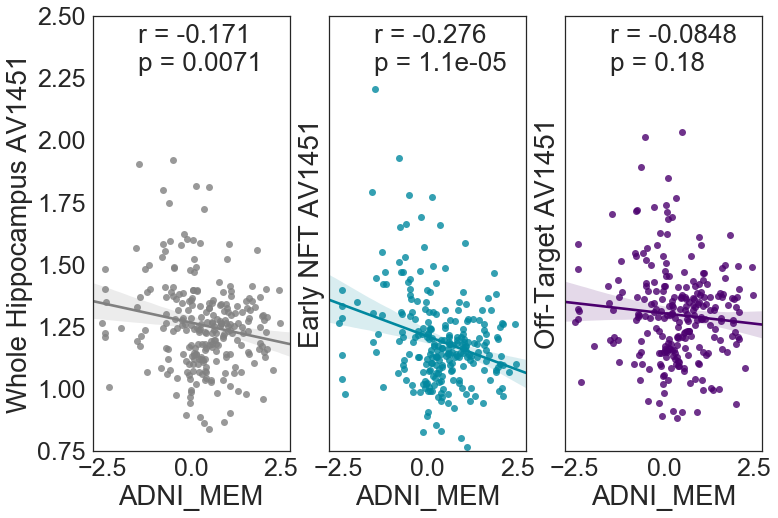

In [67]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.regplot('ADNI_MEM','AV1451 Whole Hippocampus',data=cogdf, ax=ax1, color='gray')
sns.regplot('ADNI_MEM','AV1451 Early NFT',data=cogdf, ax=ax2, color=sns.xkcd_rgb["teal blue"])
sns.regplot('ADNI_MEM','AV1451 Off-Target',data=cogdf, ax=ax3, color=sns.xkcd_rgb["royal purple"])
#for ax in [ax1,ax2,ax3]:
#    ax.set_xticks([-1.5, 0, 1.5])
ax1.set_ylabel('Whole Hippocampus AV1451')
ax2.set_ylabel('Early NFT AV1451')
ax3.set_ylabel('Off-Target AV1451')
plt.ylim(0.75, 2.5)
ax1.text(-1.5, 2.28,'r = %s\np = %s'%(float('%.3g' % whcr),float('%.2g' % whcp)), fontsize=26)
ax2.text(-1.5, 2.28,'r = %s\np = %s'%(float('%.3g' % etcr),float('%.2g' % etcp)), fontsize=26)
ax3.text(-1.5, 2.28,'r = %s\np = %s'%(float('%.3g' % otcr),float('%.2g' % otcp)), fontsize=26)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/EM_n247.pdf')
plt.show()

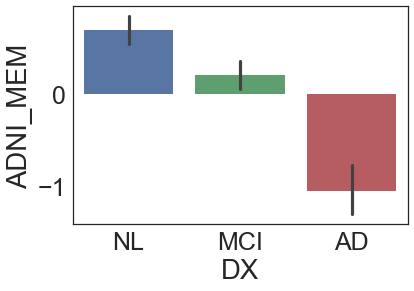

In [209]:
checkdf = bt[['DX','ADNI_MEM']].dropna()
plt.close()
sns.barplot('DX','ADNI_MEM',data=checkdf)
plt.show()

In [86]:
lmdf = pandas.DataFrame(pandas.concat([bt['AV1451 Whole Hippocampus'], 
                      bt['AV1451 Early NFT'],
                     bt['AV1451 Off-Target']]))
lmdf.columns = ['tau_signal']

In [87]:
lmdf.loc[:,'WH'] = [1] * len(bt['AV1451 Whole Hippocampus']) + [0] * (len(bt['AV1451 Whole Hippocampus'])*2)
lmdf.loc[:,'ET'] = [0] * len(bt['AV1451 Whole Hippocampus']) + [1] * len(bt['AV1451 Whole Hippocampus']) + [0] * len(bt['AV1451 Whole Hippocampus'])
lmdf.loc[:,'OT'] = [0] * (len(bt['AV1451 Whole Hippocampus'])*2) + [1] * len(bt['AV1451 Whole Hippocampus'])

In [91]:
lmdf.loc[:,'ID'] = lmdf.index
lmdf.index = range(len(lmdf.index))

In [101]:
lmdf.loc[:,'MMSE'] = bt.MMSE.tolist() + bt.MMSE.tolist() + bt.MMSE.tolist()

In [107]:
lmdf.loc[:,'measurement'] = [1] * len(bt['AV1451 Whole Hippocampus']) + [2] * len(bt['AV1451 Whole Hippocampus']) + [3] * len(bt['AV1451 Whole Hippocampus'])

In [117]:
smf.mixedlm('MMSE ~ tau_signal + ET + OT', lmdf.dropna(), groups=lmdf.dropna()['ID']).fit().summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: MMSE     
No. Observations: 639     Method:             REML     
No. Groups:       213     Scale:              0.0000   
Min. group size:  3       Likelihood:         3324.1513
Max. group size:  3       Converged:          Yes      
Mean group size:  3.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   27.756    0.123 226.487 0.000 27.516 27.996
tau_signal  -0.000    0.000  -0.000 1.000 -0.000  0.000
ET          -0.000    0.000  -0.000 1.000 -0.000  0.000
OT           0.000    0.000   0.000 1.000 -0.000  0.000
groups RE    3.199 8610.977                            
=======================================================

"""